In [1]:
#Importing the useful libraries & Warnings
import pandas as pd, numpy as np
import matplotlib.pyplot as plt , seaborn as sns
%matplotlib inline

from plotly.subplots import make_subplots
import plotly.graph_objects as go

import warnings
warnings.filterwarnings("ignore")

In [2]:
#Loading the Data and creating Dataframes

df_ad = pd.read_csv("application_data.csv")
df_bu = pd.read_csv("bureau.csv")

## Check structure of Dataframes

In [3]:
df_ad.shape

(307511, 122)

In [4]:
df_ad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [5]:
df_ad.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object', length=122)

In [6]:
df_ad.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,...,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,...,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


In [7]:
df_ad.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
#Take % of null values in each column and storing it as an object
df_ad_Null = df_ad.isnull().mean()*100

#Dropping the columns where % of Null value is greater than 50% 
col_to_drop = list(df_ad_Null[df_ad_Null > 50].index)

#col_to_drop
df_ad.drop(columns=col_to_drop, axis=1,inplace=True)

df_ad.shape

(307511, 81)

In [9]:
## After going through the columns_description.csv, we understand the following :-
##That there are many columns in the dataframe which is irrelevant and can be removed for more clairty
df_ad.columns


Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL',
       'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS',
       'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY',
       'ORGANIZATION_TYPE', 'EXT_SOURCE_2', 'EXT_SOURCE_3',
       'YEARS_BEGINEXPLUATATION_AVG', 'FLOOR

## Removing Irrelevant columns

In [10]:
irrl_cols = ['WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY',
        'EXT_SOURCE_2', 'EXT_SOURCE_3',
       'YEARS_BEGINEXPLUATATION_AVG', 'FLOORSMAX_AVG',
       'YEARS_BEGINEXPLUATATION_MODE', 'FLOORSMAX_MODE',
       'YEARS_BEGINEXPLUATATION_MEDI', 'FLOORSMAX_MEDI', 'TOTALAREA_MODE',
       'EMERGENCYSTATE_MODE', 'DAYS_LAST_PHONE_CHANGE', 'FLAG_DOCUMENT_2',
       'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5',
       'FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8',
       'FLAG_DOCUMENT_9', 'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11',
       'FLAG_DOCUMENT_12', 'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14',
       'FLAG_DOCUMENT_15', 'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17',
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR']
df_ad.drop(irrl_cols, axis=1 , inplace=True)
df_ad.shape

(307511, 41)

In [11]:
df_bu.shape

(1716428, 17)

In [12]:
df_bu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1716428 entries, 0 to 1716427
Data columns (total 17 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   SK_ID_CURR              int64  
 1   SK_ID_BUREAU            int64  
 2   CREDIT_ACTIVE           object 
 3   CREDIT_CURRENCY         object 
 4   DAYS_CREDIT             int64  
 5   CREDIT_DAY_OVERDUE      int64  
 6   DAYS_CREDIT_ENDDATE     float64
 7   DAYS_ENDDATE_FACT       float64
 8   AMT_CREDIT_MAX_OVERDUE  float64
 9   CNT_CREDIT_PROLONG      int64  
 10  AMT_CREDIT_SUM          float64
 11  AMT_CREDIT_SUM_DEBT     float64
 12  AMT_CREDIT_SUM_LIMIT    float64
 13  AMT_CREDIT_SUM_OVERDUE  float64
 14  CREDIT_TYPE             object 
 15  DAYS_CREDIT_UPDATE      int64  
 16  AMT_ANNUITY             float64
dtypes: float64(8), int64(6), object(3)
memory usage: 222.6+ MB


In [13]:
df_bu.describe()

,SK_ID_CURR,SK_ID_BUREAU,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
count,1.716428e+06,1.716428e+06,1.716428e+06,1.716428e+06,1.610875e+06,1.082775e+06,5.919400e+05,1.716428e+06,1.716415e+06,1.458759e+06,1.124648e+06,1.716428e+06,1.716428e+06,4.896370e+05
mean,2.782149e+05,5.924434e+06,-1.142108e+03,8.181666e-01,5.105174e+02,-1.017437e+03,3.825418e+03,6.410406e-03,3.549946e+05,1.370851e+05,6.229515e+03,3.791276e+01,-5.937483e+02,1.571276e+04
std,1.029386e+05,5.322657e+05,7.951649e+02,3.654443e+01,4.994220e+03,7.140106e+02,2.060316e+05,9.622391e-02,1.149811e+06,6.774011e+05,4.503203e+04,5.937650e+03,7.207473e+02,3.258269e+05
min,1.000010e+05,5.000000e+06,-2.922000e+03,0.000000e+00,-4.206000e+04,-4.202300e+04,0.000000e+00,0.000000e+00,0.000000e+00,-4.705600e+06,-5.864061e+05,0.000000e+00,-4.194700e+04,0.000000e+00
25%,1.888668e+05,5.463954e+06,-1.666000e+03,0.000000e+00,-1.138000e+03,-1.489000e+03,0.000000e+00,0.000000e+00,5.130000e+04,0.000000e+00,0.000000e+00,0.000000e+00,-9.080000e+02,0.000000e+00
50%,2.780550e+05,5.926304e+06,-9.870000e+02,0.000000e+00,-3.300000e+02,-8.970000e+02,0.000000e+00,0.000000e+00,1.255185e+05,0.000000e+00,0.000000e+00,0.000000e+00,-3.950000e+02,0.000000e+00
75%,3.674260e+05,6.385681e+06,-4.740000e+02,0.000000e+00,4.740000e+02,-4.250000e+02,0.000000e+00,0.000000e+00,3.150000e+05,4.015350e+04,0.000000e+00,0.000000e+00,-3.300000e+01,1.350000e+04
max,4.562550e+05,6.843457e+06,0.000000e+00,2.792000e+03,3.119900e+04,0.000000e+00,1.159872e+08,9.000000e+00,5.850000e+08,1.701000e+08,4.705600e+06,3.756681e+06,3.720000e+02,1.184534e+08


## Data Quality check & Missing Value Treatment

In [14]:
#Take % of null values in each column and storing it as an object
df_ad_Null = df_ad.isnull().mean()*100

#Dropping the columns where % of Null value is greater than 50% 
col_to_drop = list(df_ad_Null[df_ad_Null > 50].index)
#col_to_drop
df_ad.drop(columns=col_to_drop, axis=1,inplace=True)
#df_ad = df_ad.loc[: , (df_ad_Null <=50)]
df_ad.shape


(307511, 41)

In [15]:
#Checking top 10 columns containing highest % of Null values in the reduced DataFrame ad_clean
#This is to understand if there are still any columns whose high Nan values might impact the analysis
df_ad.isnull().mean().sort_values(ascending=False).head(10)

OCCUPATION_TYPE               0.313455
AMT_REQ_CREDIT_BUREAU_YEAR    0.135016
AMT_REQ_CREDIT_BUREAU_QRT     0.135016
AMT_REQ_CREDIT_BUREAU_MON     0.135016
AMT_REQ_CREDIT_BUREAU_WEEK    0.135016
AMT_REQ_CREDIT_BUREAU_DAY     0.135016
NAME_TYPE_SUITE               0.004201
OBS_60_CNT_SOCIAL_CIRCLE      0.003320
DEF_30_CNT_SOCIAL_CIRCLE      0.003320
OBS_30_CNT_SOCIAL_CIRCLE      0.003320
dtype: float64

## Checking the columns having lower than 13% Null values and might require treatment

In [16]:
df_ad_temp= df_ad.loc[:, ( df_ad_Null < 13)]
df_ad_temp.isnull().sum().sort_values(ascending=False).head(10)

NAME_TYPE_SUITE             1292
DEF_60_CNT_SOCIAL_CIRCLE    1021
OBS_60_CNT_SOCIAL_CIRCLE    1021
DEF_30_CNT_SOCIAL_CIRCLE    1021
OBS_30_CNT_SOCIAL_CIRCLE    1021
AMT_GOODS_PRICE              278
AMT_ANNUITY                   12
CNT_FAM_MEMBERS                2
REGION_RATING_CLIENT           0
DAYS_REGISTRATION              0
dtype: int64

### Impute the Null values in columns which might be relevant out of the above listed ones.


In [17]:
df_ad_temp.NAME_TYPE_SUITE.describe()

count            306219
unique                7
top       Unaccompanied
freq             248526
Name: NAME_TYPE_SUITE, dtype: object

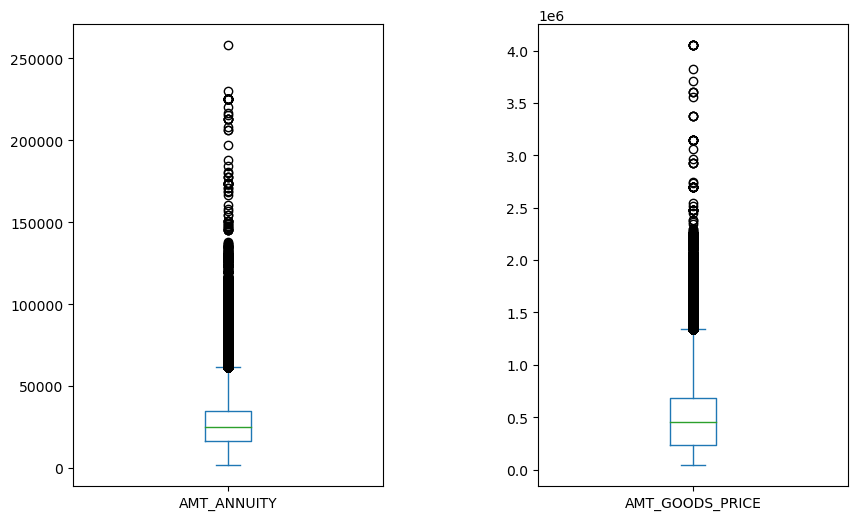

In [18]:
##Check if their are outliers for the below 2 columns as they are continous
## if yes then we will have to use median to fill Null

df_ad_temp.plot(column=("AMT_ANNUITY","AMT_GOODS_PRICE"), kind='box', subplots=True, sharey=False,figsize=(10, 6))
 
# increase spacing between subplots
plt.subplots_adjust(wspace=0.5) 
plt.show()


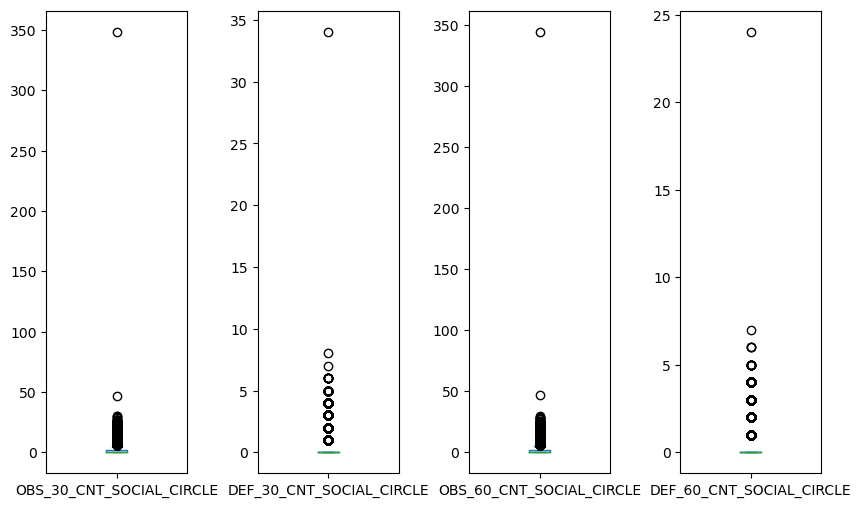

In [19]:
##Check if their are outliers for the below 2 columns as they are discreet
## If yes then we will have to use Mode to fill Null

df_ad_temp.plot(column=("OBS_30_CNT_SOCIAL_CIRCLE","DEF_30_CNT_SOCIAL_CIRCLE","OBS_60_CNT_SOCIAL_CIRCLE","DEF_60_CNT_SOCIAL_CIRCLE"), kind='box', subplots=True, sharey=False,figsize=(10, 6))
 
# increase spacing between subplots
plt.subplots_adjust(wspace=0.5) 
plt.show()

In [20]:
## Filling in the missing values depending on the type of vaiable, continous or discreet &
## Outliers presence  : present in all beow 6 variables
df_ad.AMT_GOODS_PRICE.fillna( df_ad.AMT_GOODS_PRICE.median(),inplace = True)
df_ad.AMT_ANNUITY.fillna( df_ad.AMT_ANNUITY.median(),inplace = True)
df_ad.NAME_TYPE_SUITE.fillna( df_ad.NAME_TYPE_SUITE.mode()[0],inplace = True)
df_ad.OBS_30_CNT_SOCIAL_CIRCLE.fillna( df_ad.OBS_30_CNT_SOCIAL_CIRCLE.mode()[0],inplace = True) 
df_ad.DEF_30_CNT_SOCIAL_CIRCLE.fillna( df_ad.DEF_30_CNT_SOCIAL_CIRCLE.mode()[0],inplace = True) 
df_ad.OBS_60_CNT_SOCIAL_CIRCLE.fillna( df_ad.OBS_60_CNT_SOCIAL_CIRCLE.mode()[0],inplace = True) 
df_ad.DEF_60_CNT_SOCIAL_CIRCLE.fillna( df_ad.DEF_60_CNT_SOCIAL_CIRCLE.mode()[0],inplace = True)

## Change the Days related column to years and positive absolute values

In [21]:
# Divide 'DAYS_BIRTH' & 'DAYS_EMPLOYED' by 365 for converting them into years and abs positive values
df_ad['DAYS_BIRTH']= abs(df_ad['DAYS_BIRTH']//365)
df_ad['DAYS_EMPLOYED']= abs(df_ad['DAYS_EMPLOYED']//365)
df_ad.rename(columns = {'DAYS_BIRTH':'AGE'}, inplace = True)

In [22]:
df_ad.isnull().sum()

SK_ID_CURR                         0
TARGET                             0
NAME_CONTRACT_TYPE                 0
CODE_GENDER                        0
FLAG_OWN_CAR                       0
FLAG_OWN_REALTY                    0
CNT_CHILDREN                       0
AMT_INCOME_TOTAL                   0
AMT_CREDIT                         0
AMT_ANNUITY                        0
AMT_GOODS_PRICE                    0
NAME_TYPE_SUITE                    0
NAME_INCOME_TYPE                   0
NAME_EDUCATION_TYPE                0
NAME_FAMILY_STATUS                 0
NAME_HOUSING_TYPE                  0
REGION_POPULATION_RELATIVE         0
AGE                                0
DAYS_EMPLOYED                      0
DAYS_REGISTRATION                  0
DAYS_ID_PUBLISH                    0
FLAG_MOBIL                         0
FLAG_EMP_PHONE                     0
FLAG_WORK_PHONE                    0
FLAG_CONT_MOBILE                   0
FLAG_PHONE                         0
FLAG_EMAIL                         0
O

In [23]:
#Correct Nan in Occupation type and XNA in Organisation type
#Print all columns related to Oragnisation type & Occupation type to see if they has some relation with 
df_ad[df_ad.OCCUPATION_TYPE.isnull()][["ORGANIZATION_TYPE","OCCUPATION_TYPE","NAME_INCOME_TYPE"]]


,ORGANIZATION_TYPE,OCCUPATION_TYPE,NAME_INCOME_TYPE
8,XNA,NaN,Pensioner
11,XNA,NaN,Pensioner
23,XNA,NaN,Pensioner
28,Military,NaN,State servant
30,Business Entity Type 3,NaN,Commercial associate
...,...,...,...
307486,Business Entity Type 2,NaN,Commercial associate
307487,XNA,NaN,Pensioner
307500,Business Entity Type 3,NaN,Working
307505,XNA,NaN,Pensioner


In [24]:
#Put a pivot table to find relations between Organisation type and Name Income Type columns
pd.pivot_table(df_ad, values ="SK_ID_CURR", index=["ORGANIZATION_TYPE"],columns=["NAME_INCOME_TYPE"],aggfunc="count")

NAME_INCOME_TYPE,Businessman,Commercial associate,Maternity leave,Pensioner,State servant,Student,Unemployed,Working
ORGANIZATION_TYPE,,,,,,,,
Advertising,NaN,180.0,NaN,NaN,17.0,NaN,NaN,232.0
Agriculture,NaN,360.0,NaN,NaN,76.0,NaN,NaN,2018.0
Bank,1.0,1275.0,1.0,NaN,94.0,1.0,NaN,1135.0
Business Entity Type 1,NaN,2114.0,1.0,NaN,84.0,1.0,NaN,3784.0
Business Entity Type 2,NaN,2785.0,NaN,1.0,268.0,2.0,NaN,7497.0
Business Entity Type 3,1.0,25089.0,NaN,3.0,627.0,3.0,NaN,42269.0
Cleaning,NaN,74.0,NaN,NaN,5.0,NaN,NaN,181.0
Construction,NaN,2074.0,NaN,NaN,70.0,NaN,NaN,4577.0
Culture,NaN,86.0,NaN,NaN,74.0,NaN,NaN,219.0


In [25]:
#It is clear from the above pivot that Organisation Type is XNA mostly in income type 'Pensioner' and Viceversa
# So replace XNA with 'Pensioner' in Organisation type
df_ad["ORGANIZATION_TYPE"] = df_ad["ORGANIZATION_TYPE"].replace("XNA","Pensioner")

In [26]:
#Check the relationship between null Occupation type cases and corresponding Name Income Type
df_ad[df_ad.OCCUPATION_TYPE.isnull()].NAME_INCOME_TYPE.value_counts(normalize=True)*100

Pensioner               57.429636
Working                 25.853036
Commercial associate    12.757415
State servant            3.928790
Unemployed               0.022824
Student                  0.005187
Businessman              0.002075
Maternity leave          0.001037
Name: NAME_INCOME_TYPE, dtype: float64

In [27]:
#From the above value count it's evident that most of the Occupation type is null for pensioner(57%) so fillna with same 
df_ad.OCCUPATION_TYPE.fillna( "Pensioner",inplace = True)

In [28]:
#4 Rows in Gender contains XNA value, change them to "F" as it has highest frequency
df_ad.CODE_GENDER.value_counts()

F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64

In [29]:
df_ad["CODE_GENDER"] = df_ad["CODE_GENDER"].replace("XNA","F")

In [30]:
#columns like Flag Onw car and Flag Own Realty contains values as Y or N, Convert them into 1 or 0
df_ad['FLAG_OWN_CAR']=np.where(df_ad['FLAG_OWN_CAR']=='Y', 1, 0)
df_ad['FLAG_OWN_REALTY']=np.where(df_ad['FLAG_OWN_REALTY']=='Y', 1, 0)

In [31]:
# Drop the rows where CNT_FAM_MEMBERS are null as it's only 2 rows as shown above out of 307511 data which is very low
df_ad = df_ad[~np.isnan(df_ad['CNT_FAM_MEMBERS'])]

In [32]:
#Change the data type of all object type columns into category type to save memomry, improve processing time etc.
cat_col = list(df_ad.select_dtypes(['object']).columns)
cat_col

['NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'OCCUPATION_TYPE',
 'ORGANIZATION_TYPE']

In [33]:
for i in cat_col:
    df_ad[i]=df_ad[i].astype('category')
    
df_ad.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 307509 entries, 0 to 307510
Data columns (total 41 columns):
 #   Column                       Non-Null Count   Dtype   
---  ------                       --------------   -----   
 0   SK_ID_CURR                   307509 non-null  int64   
 1   TARGET                       307509 non-null  int64   
 2   NAME_CONTRACT_TYPE           307509 non-null  category
 3   CODE_GENDER                  307509 non-null  category
 4   FLAG_OWN_CAR                 307509 non-null  int64   
 5   FLAG_OWN_REALTY              307509 non-null  int64   
 6   CNT_CHILDREN                 307509 non-null  int64   
 7   AMT_INCOME_TOTAL             307509 non-null  float64 
 8   AMT_CREDIT                   307509 non-null  float64 
 9   AMT_ANNUITY                  307509 non-null  float64 
 10  AMT_GOODS_PRICE              307509 non-null  float64 
 11  NAME_TYPE_SUITE              307509 non-null  category
 12  NAME_INCOME_TYPE             307509 non-null

In [34]:
#df_ad.to_csv('application_data_final.csv', encoding='utf-8',index=False)

## Check Data Imbalance

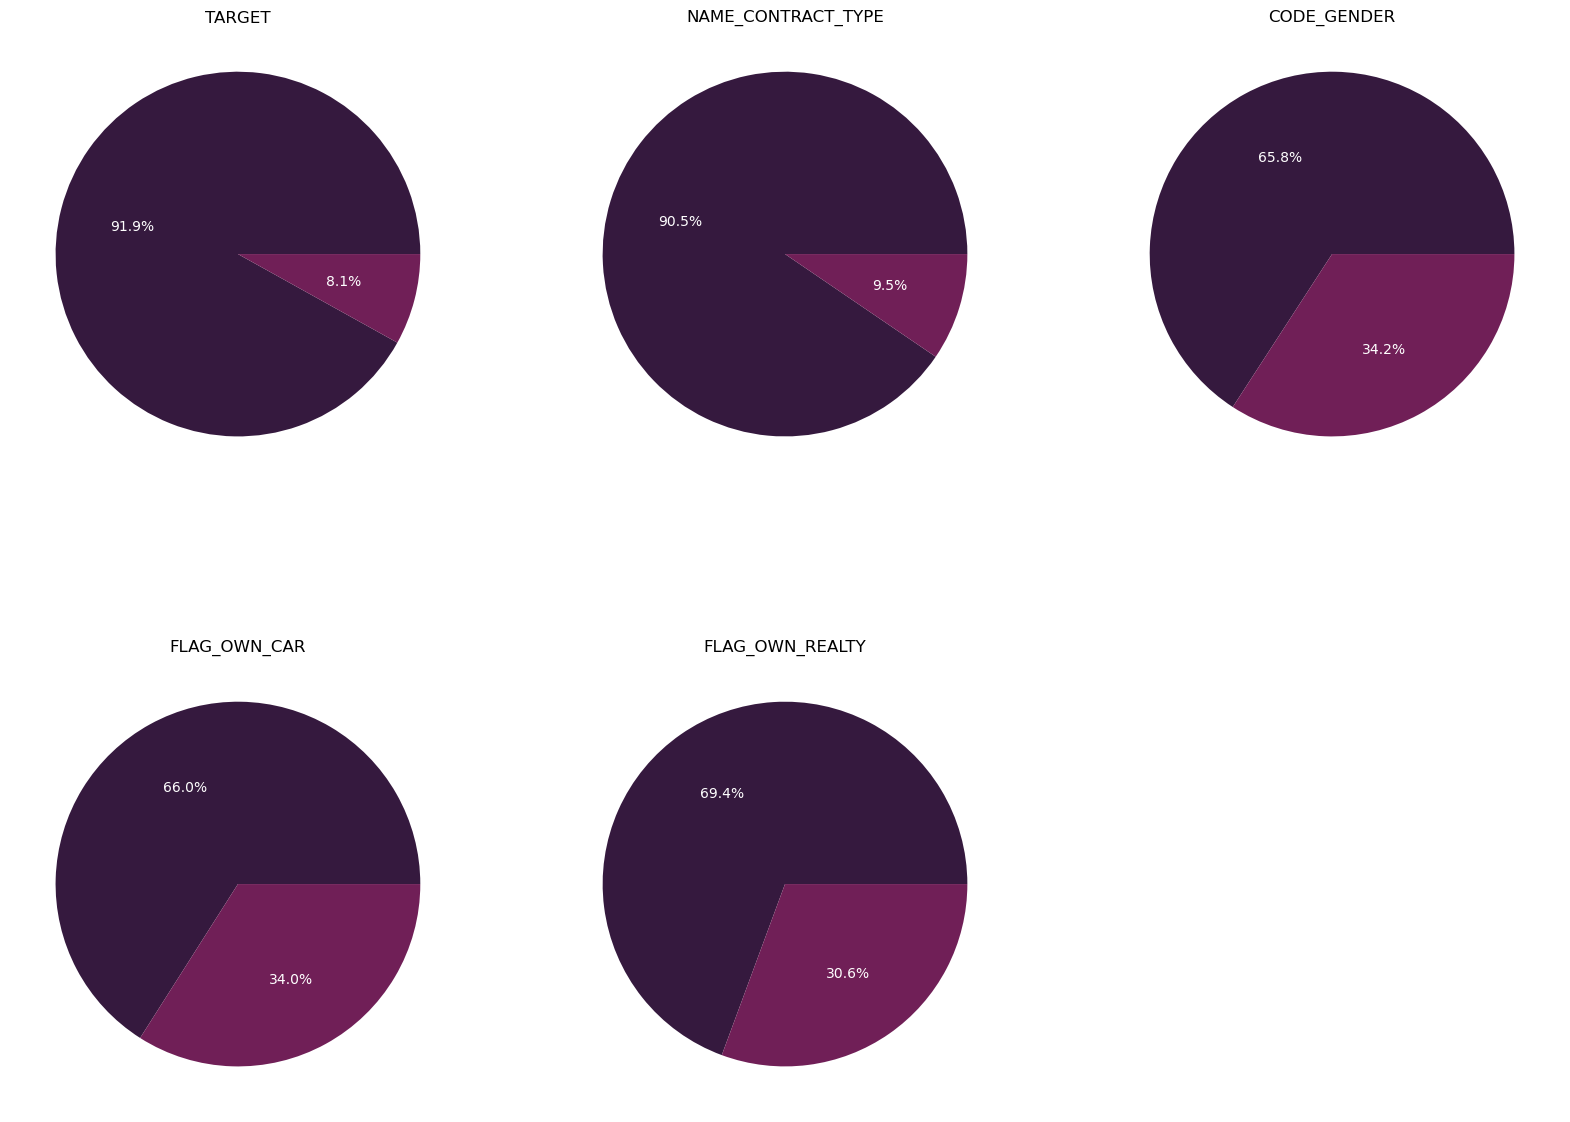

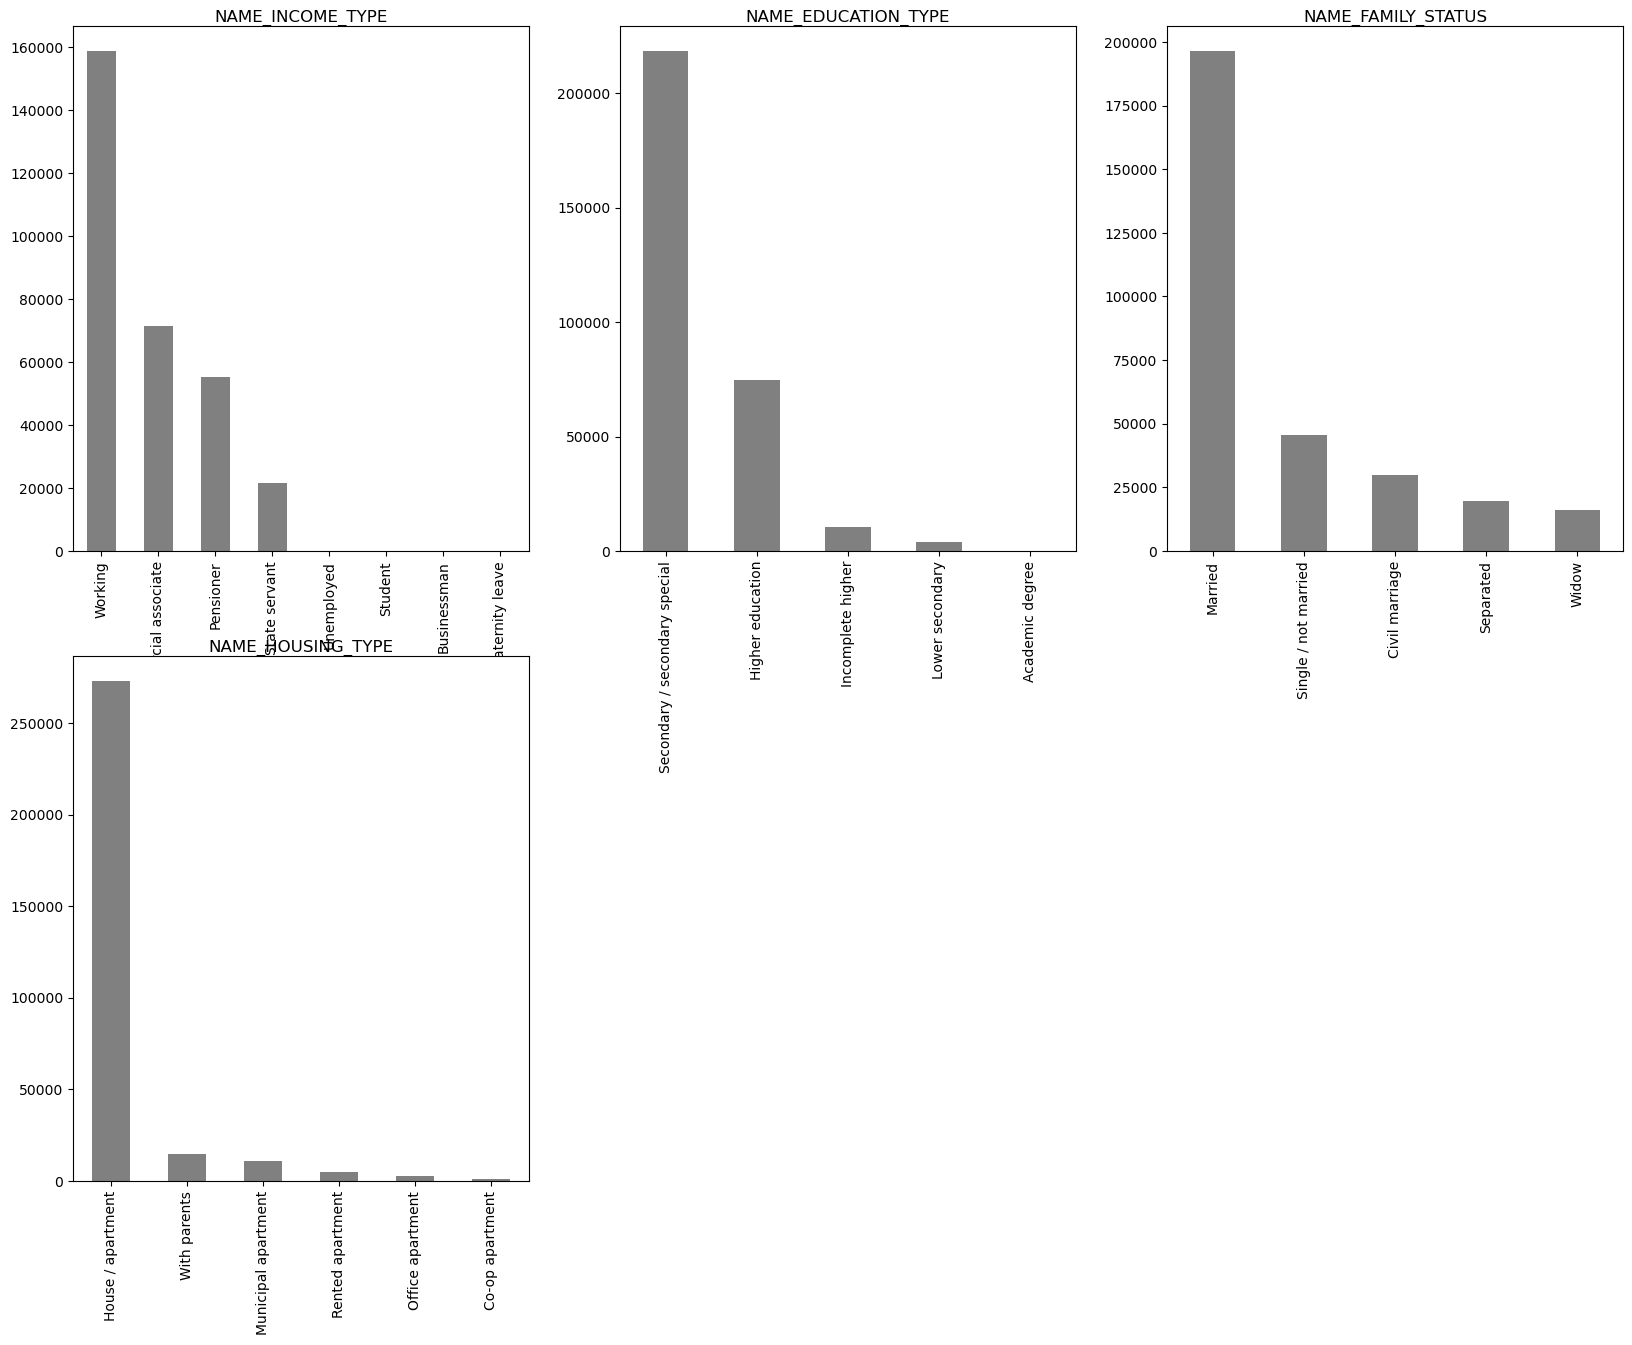

In [35]:
# Prepare list of columns for checking data imbalance and plot them as bar chart for Analysis
#define Seaborn color palette to use
colors = sns.color_palette('rocket')
col_lst_pie= ['TARGET','NAME_CONTRACT_TYPE','CODE_GENDER','FLAG_OWN_CAR','FLAG_OWN_REALTY']
col_lst_bar = ['NAME_INCOME_TYPE','NAME_EDUCATION_TYPE','NAME_FAMILY_STATUS','NAME_HOUSING_TYPE']
n=1
plt.figure(figsize=(20,15))
for col in col_lst_pie:    
    plt.subplot(2,3,n)    
    df_ad[col].value_counts().plot(kind='pie', autopct='%1.1f%%',colors=colors, textprops={'color':"w"})
    plt.title(col, pad=2)
    plt.ylabel("")
    n=n+1
m=1
plt.figure(figsize=(20,15))
for col in col_lst_bar:    
    plt.subplot(2,3,m)    
    df_ad[col].value_counts().plot(kind='bar',color="grey")
    plt.title(col, pad=2)
    m=m+1


#### We can see that there is data imbalance in below columns:-
- TARGET - No. of defaulters (Target:1) is very low compared to non-defaulters (Target:0).Imabalance Ratio is 11.5
- GENDER_CODE - 65.8% Applicant's are Female and only 34.2% applicantants are male.
- NAME_CONTRACT_TYPE - There are much more applications for cash loan then revolving loan.
- NAME_EDUCATION_TYPE - Most of the loans applied by Secondary/Secondary special educated people
- NAME_HOUSING_TYPE - Most of the application came from Home/appartment owner

## Break the dataframe into defaulters and non-Defaulters to analyse it further in detail

In [36]:
df_dflt = df_ad[df_ad.TARGET ==1]
df_Ndflt = df_ad[df_ad.TARGET ==0]

### Extract/Observe and Infer the variables for each of the above dataframe

### Univariate Analysis

#### Univariate Analysis of Nominal & Ordenal Categorical Values
- NAME_CONTRACT_TYPE, CODE_GENDER, NAME_TYPE_SUITE, NAME_INCOME_TYPE, NAME_EDUCATION_TYPE, NAME_FAMILY_STATUS, NAME_HOUSING_TYPE, OCCUPATION_TYPE, ORGANIZATION_TYPE, AGE_GROUP, INCOME_GROUP, CREDIT_GROUP


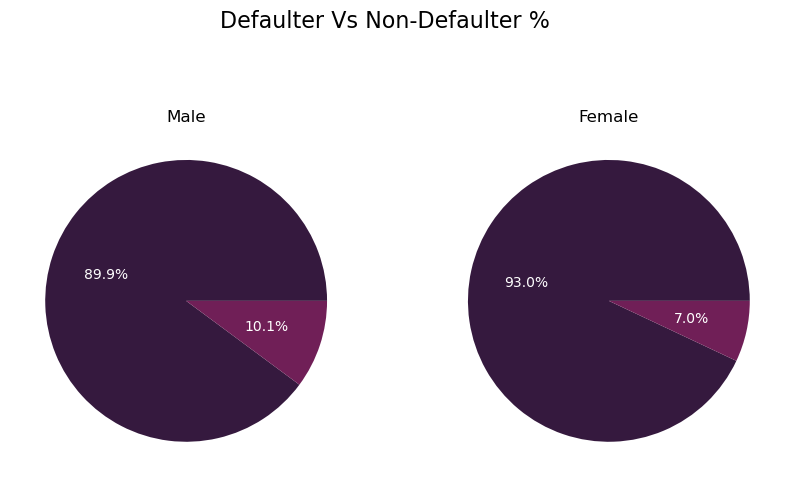

In [37]:
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)   
plt.suptitle("Defaulter Vs Non-Defaulter %" , fontsize=16)
df_ad[(df_ad.CODE_GENDER == 'M')].TARGET.value_counts().plot(kind='pie', autopct='%1.1f%%',colors=colors, textprops={'color':"w"})
plt.title("Male",pad=2)
plt.ylabel("")
plt.subplot(1,2,2)    
df_ad[(df_ad.CODE_GENDER == 'F')].TARGET.value_counts().plot(kind='pie', autopct='%1.1f%%',colors=colors, textprops={'color':"w"})
plt.title("Female", pad=2)
plt.ylabel("") 
plt.show()

#### Observation :
- 10% of the Male defaulted the loan while only 7 % of the women defaulted the loans.
#### Inference :
- It's safer to approve loans for Females than Males

In [38]:
# Create a customised function to create bar plot for categorical columns, along with formatting & size in one go
def bargraph(col, rot_req = False, narrow = True):
    df_ad_values = round(df_ad[col].value_counts(normalize = True)*100,1)
    groupby_plot = round(df_ad.groupby(df_ad[col]).mean().TARGET*100,1)

    
    if narrow:
        plt.figure(figsize=[15,7])
        x = df_ad_values.index
        y = df_ad_values.values
        plt.subplot(1,2,1)
        ax=sns.barplot(x=x,y=y, order=x, palette= colors)
        plt.xlabel(col)
        plt.ylabel("Applicant %")
        plt.title("Total Loan Applications",pad=2)
        for i, v in enumerate(y):
           ax.text(i, v/2, str(v)+"%", ha='center', color='white')
        if rot_req:
            plt.xticks(rotation = 90)  
    
        x = groupby_plot.index
        y = groupby_plot.values
        plt.subplot(1,2,2) 
        ax=sns.barplot(x=x,y=y, order=x, palette= colors)
        plt.xlabel(col)
        plt.ylabel("Delinquent Applicant % ")
        plt.title("Defaulted Loan Applications",pad=2)    
        for i, v in enumerate(y):
           ax.text(i, v/2, str(v)+"%", ha='center', color='white')
        if rot_req:
            plt.xticks(rotation = 90)
        plt.show()
        
        
    else:
        plt.figure(figsize=[20,20])
        x = df_ad_values.index
        y = df_ad_values.values
        plt.subplot(2,1,1)
        ax=sns.barplot(x = x, y = y,order=x, palette= colors)
        plt.xlabel(col)
        plt.ylabel("Applicants %")
        plt.title("Total Loan Applications",pad=2)  
        for i, v in enumerate(df_ad_values.values):
           ax.text(i, v/2, str(v)+"%", ha='center', color='white')
        if rot_req:
            plt.xticks(rotation = 90)    
        
        x = groupby_plot.index
        y = groupby_plot.values
        plt.subplot(2,1,2)
        ax=sns.barplot(x = x, y = y,order=x, palette= colors)
        plt.xlabel(col)
        plt.ylabel("Delinquent Applicant %")
        plt.title("Defaulted Loan Applications",pad=2)  
        for i, v in enumerate(y):
           ax.text(i, v/2, str(v)+"%", ha='center', color='white')
        if rot_req:
            plt.xticks(rotation = 90)
        plt.show()


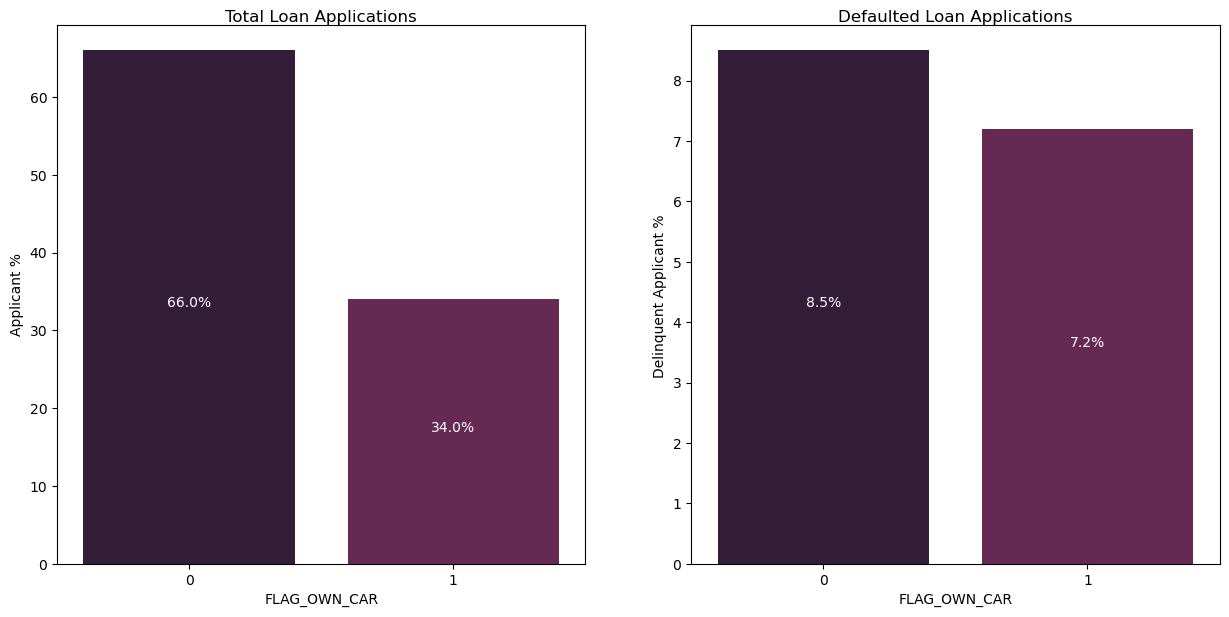

In [39]:
# Analysing Car Ownership (FLAG_OWN_CAR)
bargraph('FLAG_OWN_CAR')

#### Observations
- Out of Total Loan Applications only 34% of people own a car
- 8.5% of people who dont own a car defaulted the loan compared to 7.2% who owns a car
#### Inferences
- People who owns a car mostly dont need loans, maybe as they already have enough funds with them.
- People who dont own a car and are low on funds are more likely to default a loan.

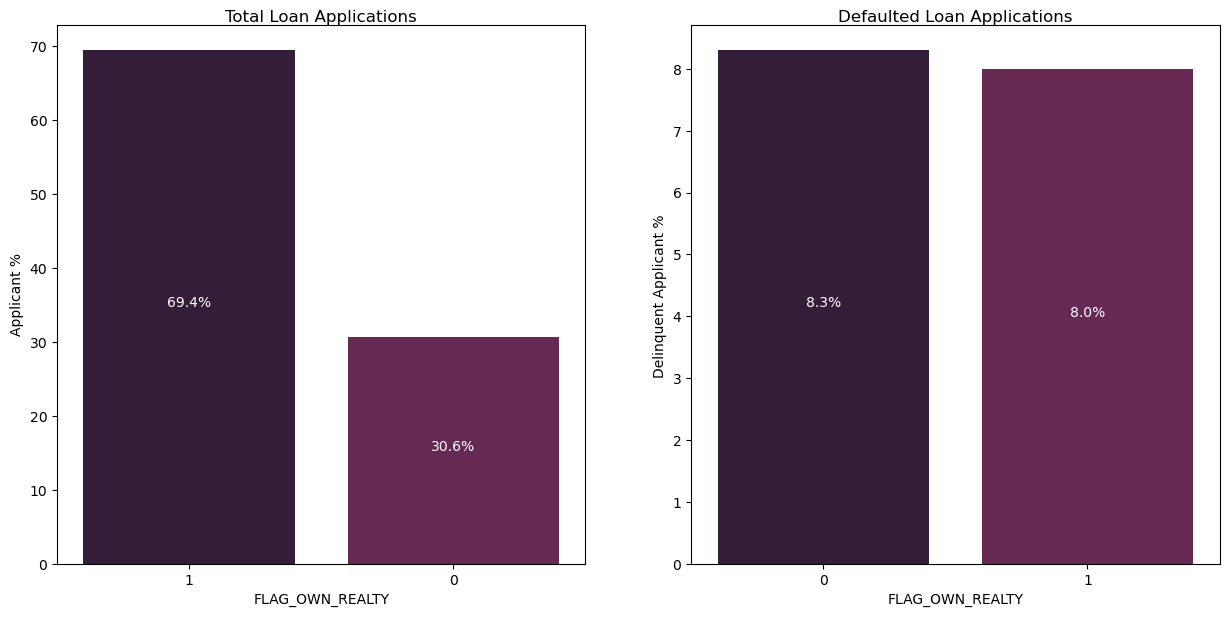

In [40]:
# Analysing Realty Ownership (FLAG_OWN_REALTY)
bargraph('FLAG_OWN_REALTY')

#### Observations
- People who own a Realty apply more for Loans, 69.4%, vs 30.6% who doesnt own a Realty.
- Default % is same among realty owners ad non-owners, i.e ~8% 

#### Inferences
- People who own a home apply more for loans may be to buy the realty or maybe to meet other expense as their disposable income in hand might be lesser due to mortgage loan.
- No Inference can be derived on default characertstics for both type of categories as both are close to 8%.

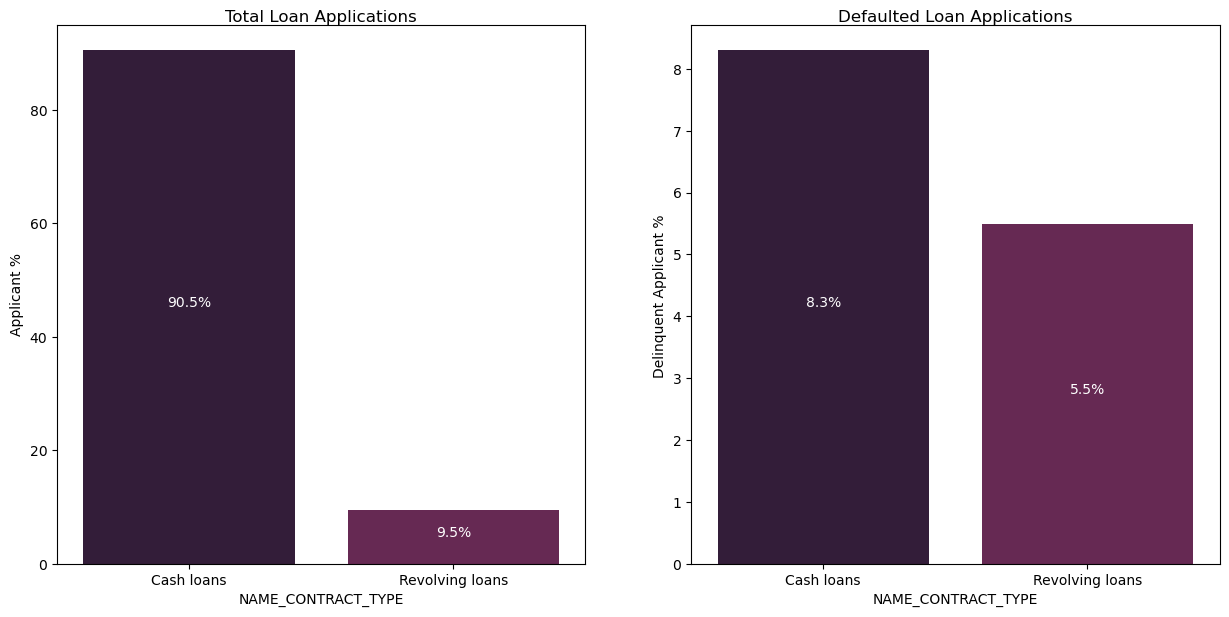

In [41]:
# Analysing Types of Loan (NAME_CONTRACT_TYPE)
bargraph('NAME_CONTRACT_TYPE')

#### Observations
- Application for cash Loan is more than Revolving loans
- 8.3% of Cash loan applicants default on payments where as revolving loan applicants default rate is only 5.5%

#### Inferences
- Default rate is higher in case of cash loan
- Revolving loans are safer to approve as it has lower % of deliquency and should be promoted more then cash loan

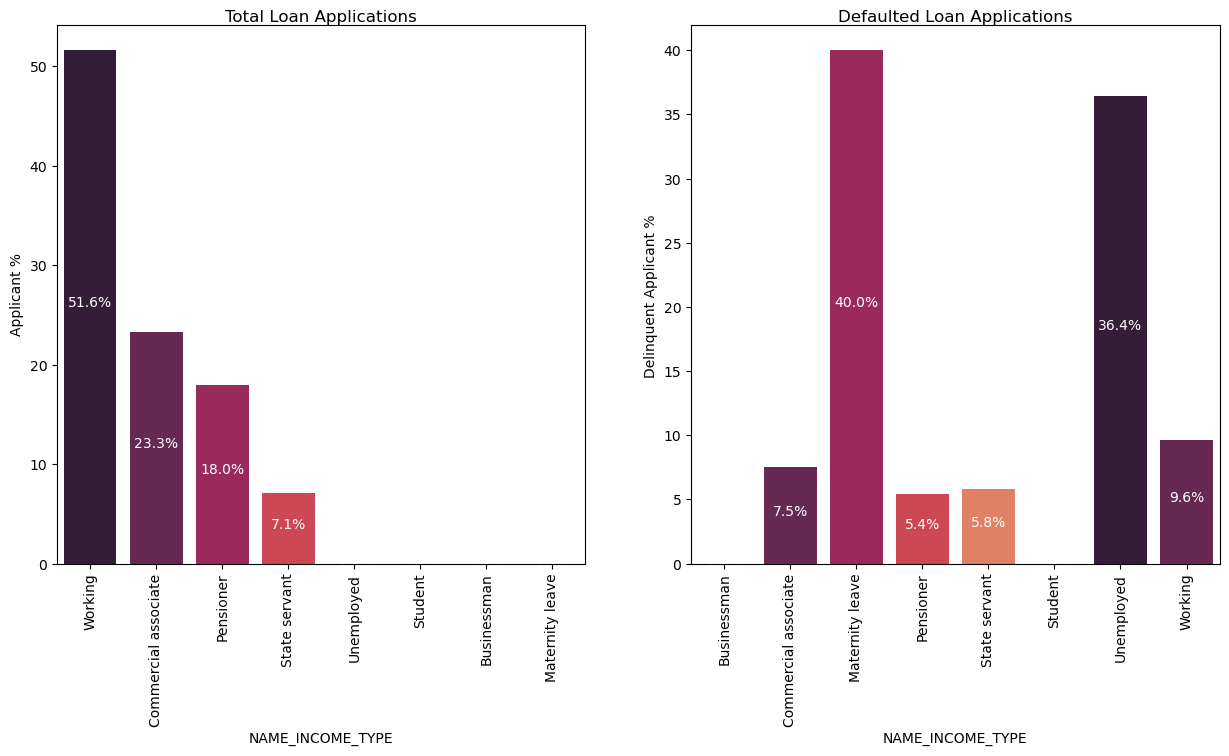

In [42]:
#Analysing Type of Income ('NAME_INCOME_TYPE')
bargraph('NAME_INCOME_TYPE',rot_req = True)

#### Observations :
- Highest number of credit applicants belong to "Working" Income Type.
- Applicants who are on Maternity leave and Unemployed are most prone to default the loans.

#### Inferences :
- People who do not hav a job/source of Income at hand are most prone to default the loan migth be because they dont have any source of income.

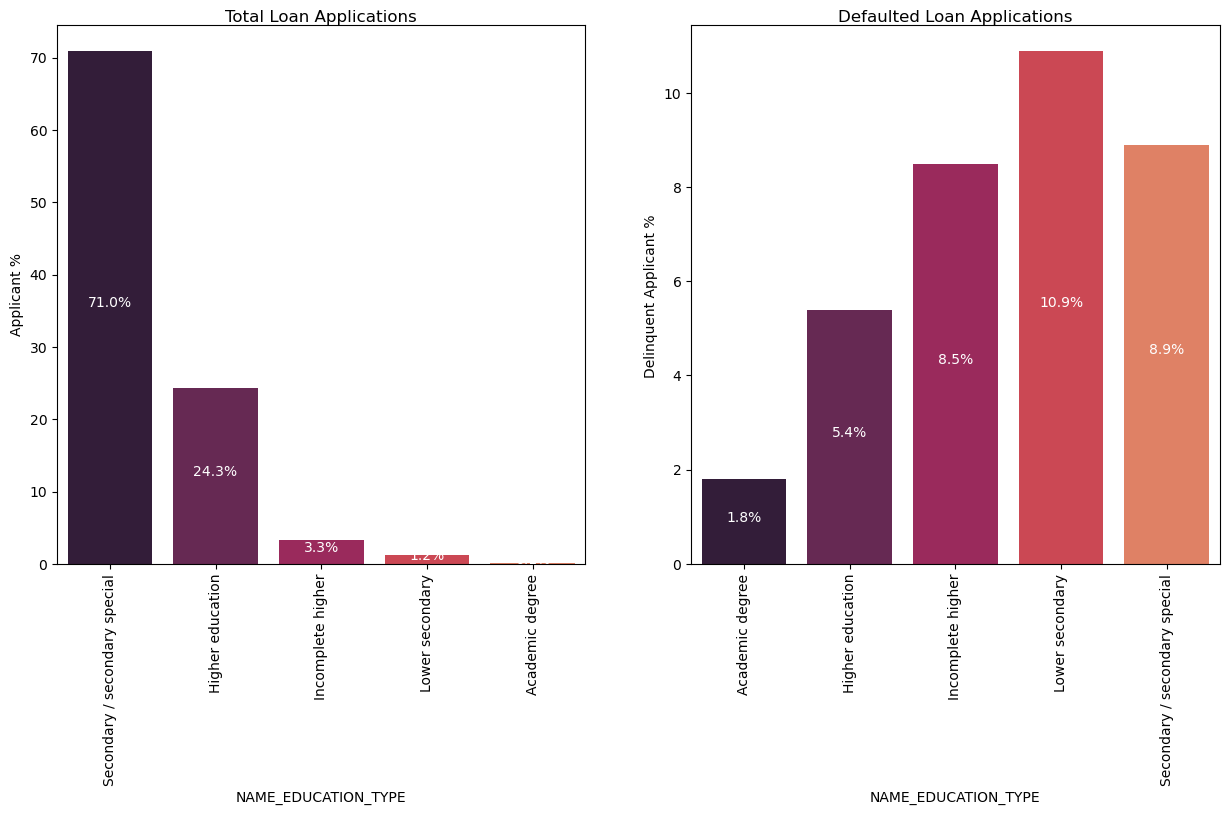

In [43]:
#Analysing Type of Education ('NAME_EDUCATION_TYPE')
bargraph('NAME_EDUCATION_TYPE',rot_req = True)

#### Observations :
- Highest number of credit applicants have completed secondary/Secondary special followed by Higher Education.
- Highest default % is among the applicants who have just completed Lower Secondary or seondary/secondary special.

#### Inferences : 
- Default % is highest for the lowest education applicants and the default % goes down as the education level goes up.

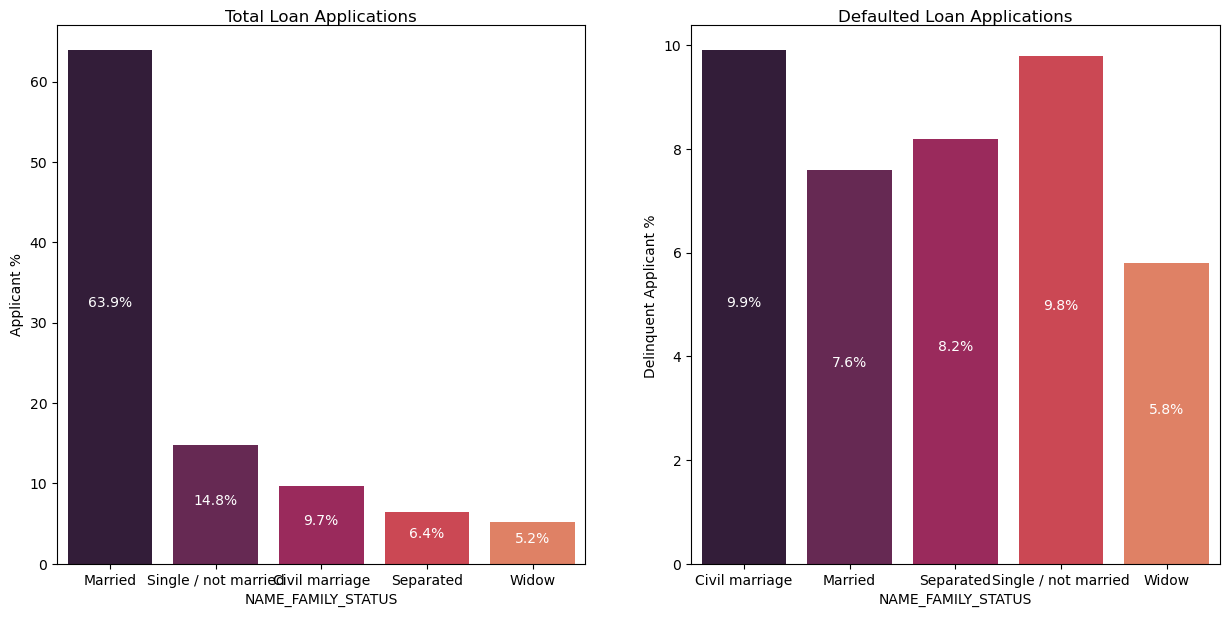

In [44]:
#Analysing Type of Family Status ('NAME_FAMILY_STATUS')
bargraph('NAME_FAMILY_STATUS')

#### Observations & Inferences :
- Almost 74% of the applicants are married (Married+Civil Marriage)
- Civil Marriage and Single/Not Married are most prone to default @9.9% and @9.8% repectively


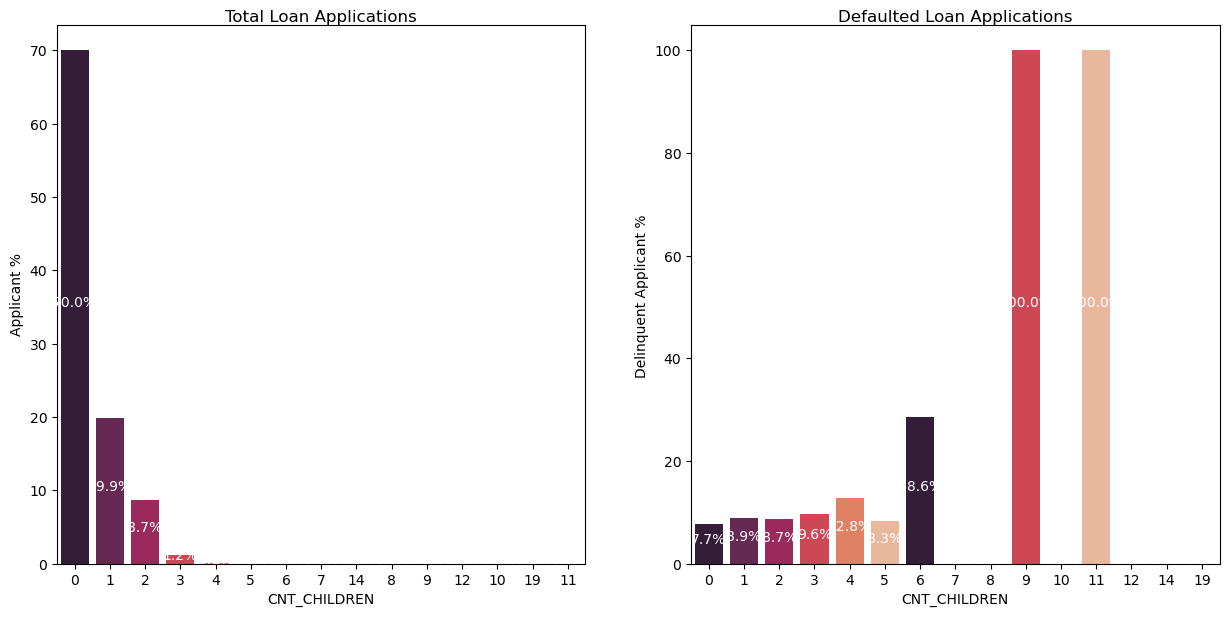

In [45]:
#Analysing Type of Accomodation ('CNT_CHILDREN')
bargraph('CNT_CHILDREN')

#### Observations :
- Highest number of loan applicants are those without children followed by 1 child followed by 2 children.
- Applicants with 6 or above are prone to default.
- Applicants with 9 & 11 children have defaulted 100%.

#### Inferences :
- Applicant with 6 or more should be approved a credit with utmost caution.

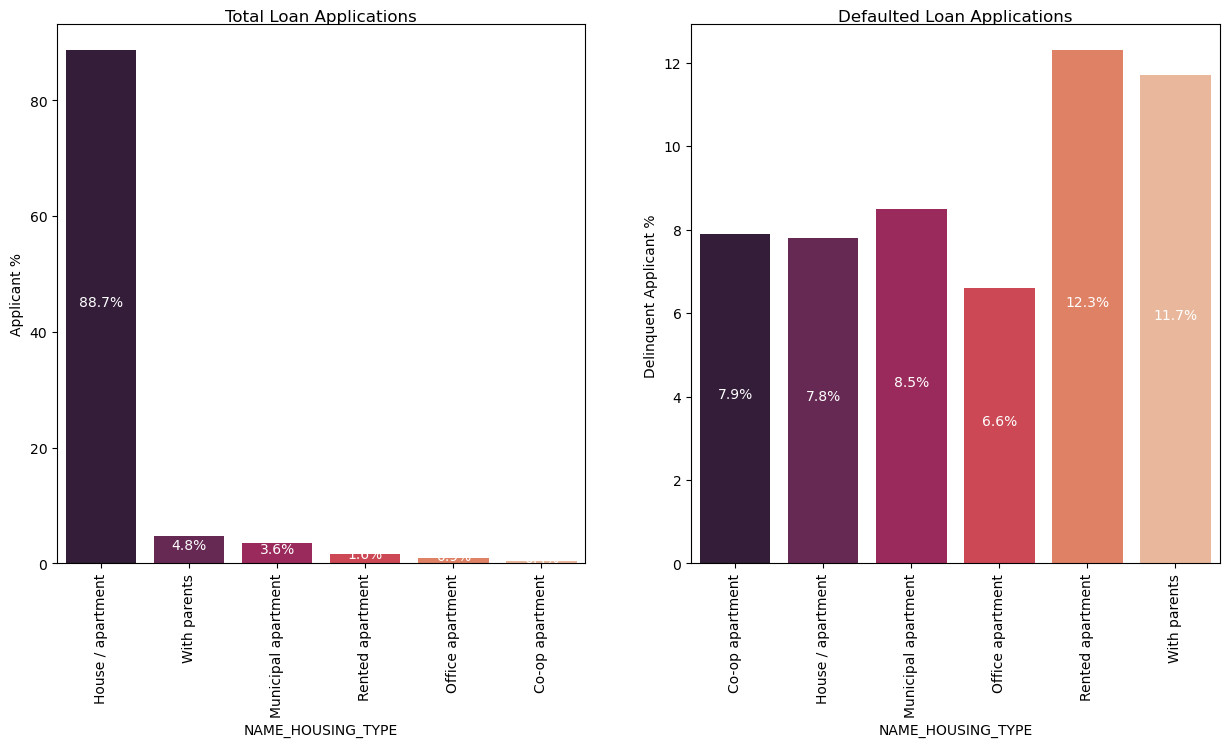

In [46]:
#Analysing Type of Accomodation ('NAME_HOUSING_TYPE')
bargraph('NAME_HOUSING_TYPE', rot_req=True)

#### Observations :
- People living in their own house have applied for credit the most @88.7% followed by people lving with parents @4.8%
- People lving in rented appartment and with parents have the highest default %.

#### Inference :
- Applicants who are either living in rented appartment or with parents are most prone to credit default and the loans to them can be risky.


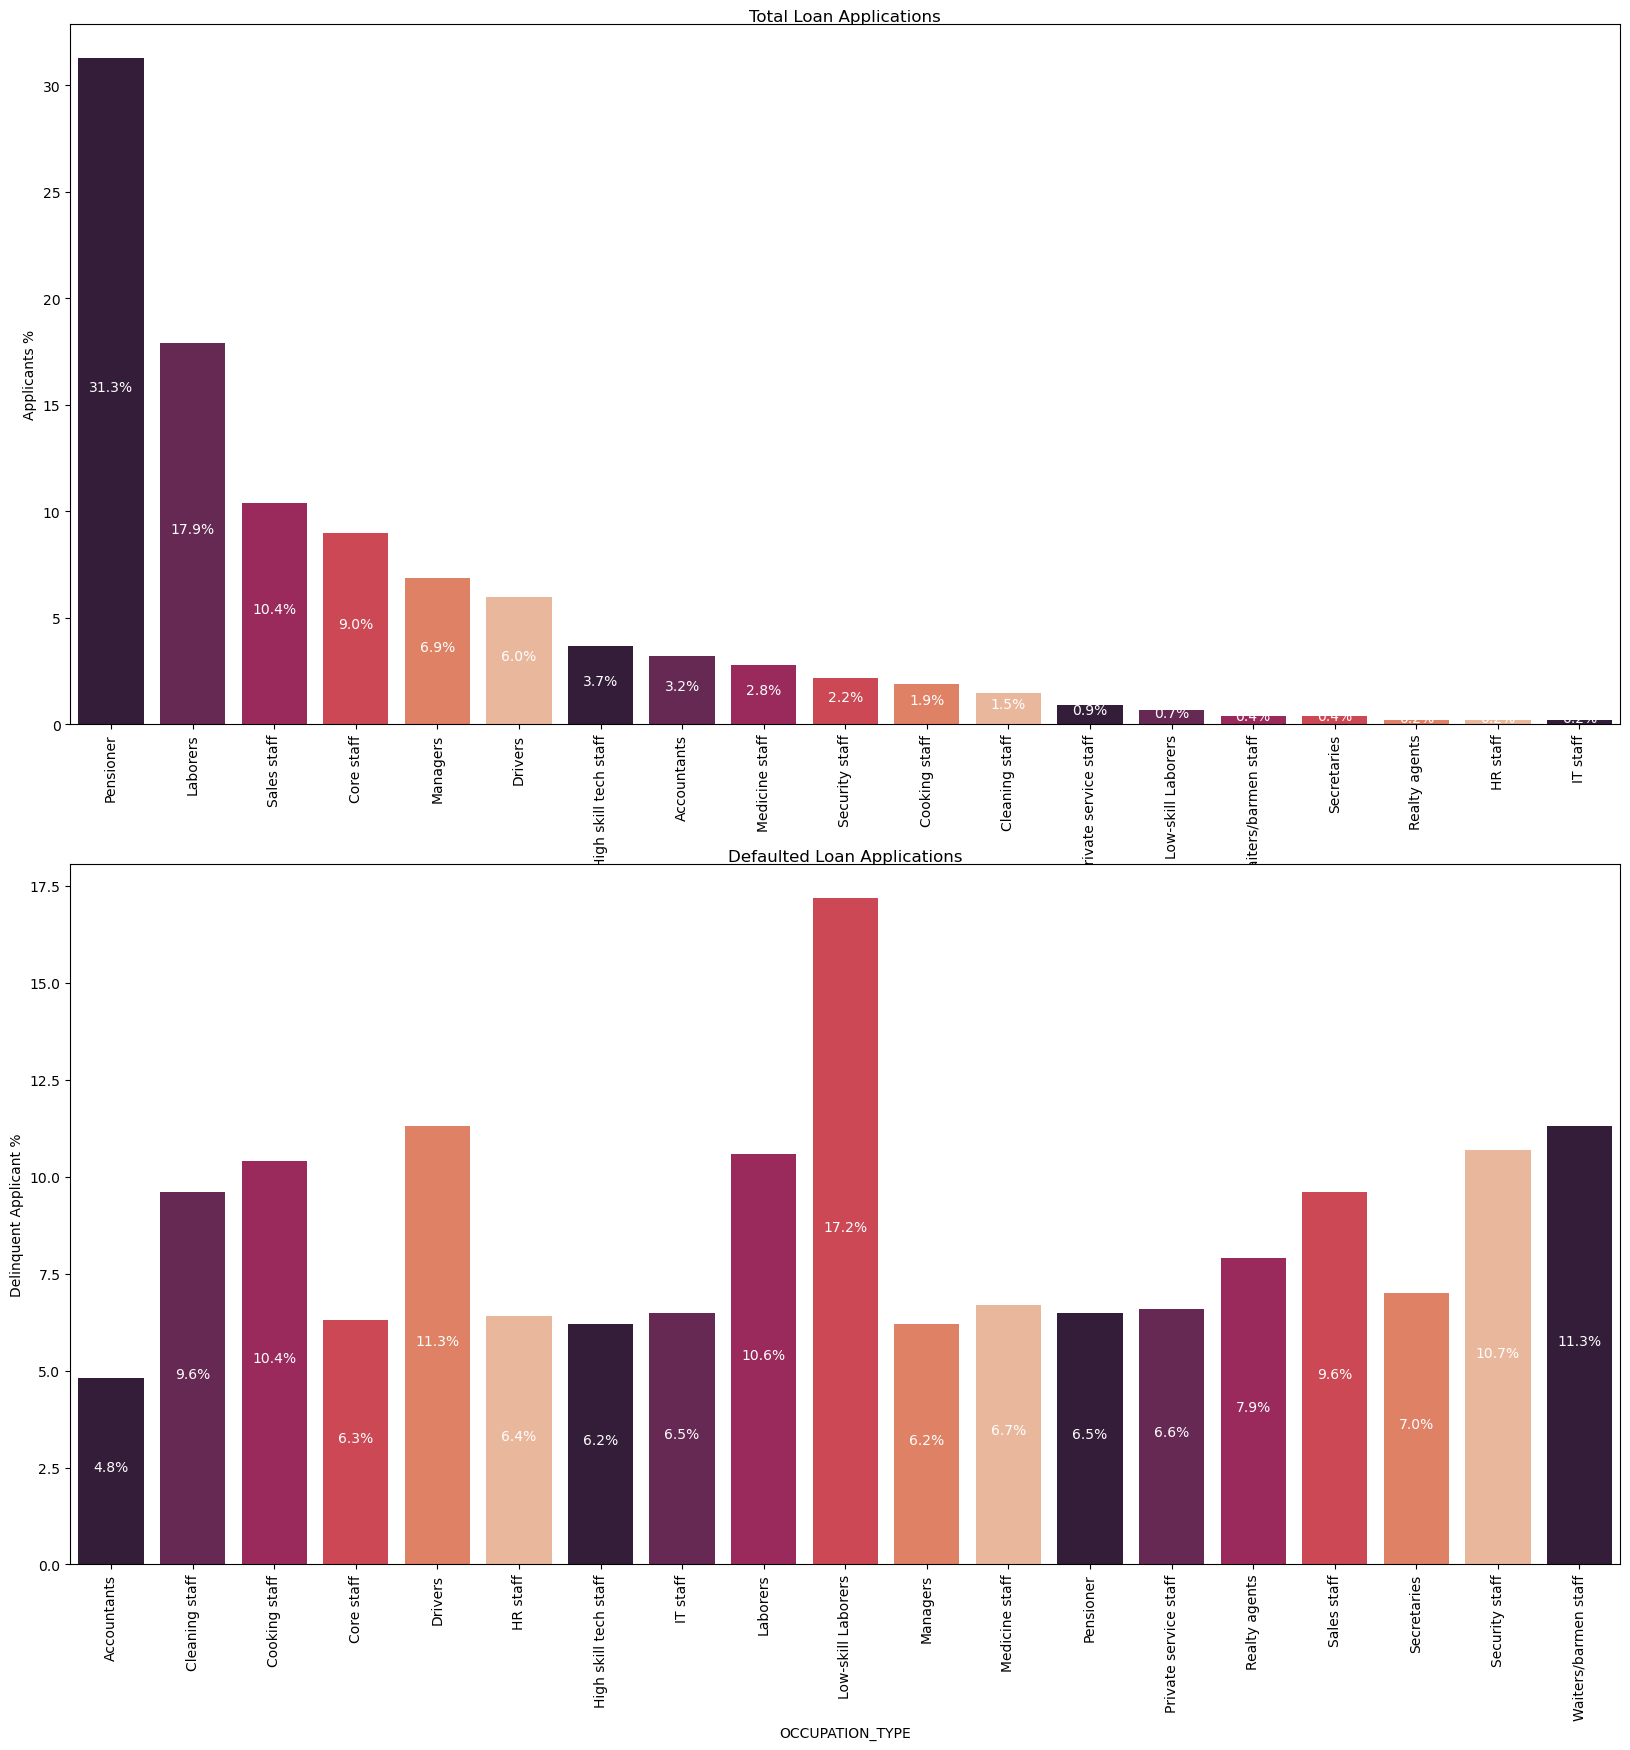

In [47]:
#Analysing Type of Occupation ('OCCUPATION_TYPE')
bargraph('OCCUPATION_TYPE', rot_req=True, narrow=False)

#### Observations :
- Pensioners have sent the highest number of applications followed by laborers.
- Low-Skill Laborers has highest tendency of defaulting the loan.
- occupation types which require lower education are most prone to default and are at default % of 10% or above.
    ex- Drivers , Waiters, Security staff , cooking and cleaning staff, low skilled laborers & laborers.
#### Inference :     
- Occupation which requires lower education are more prone to default the loan and have a default % of 10% or higher.


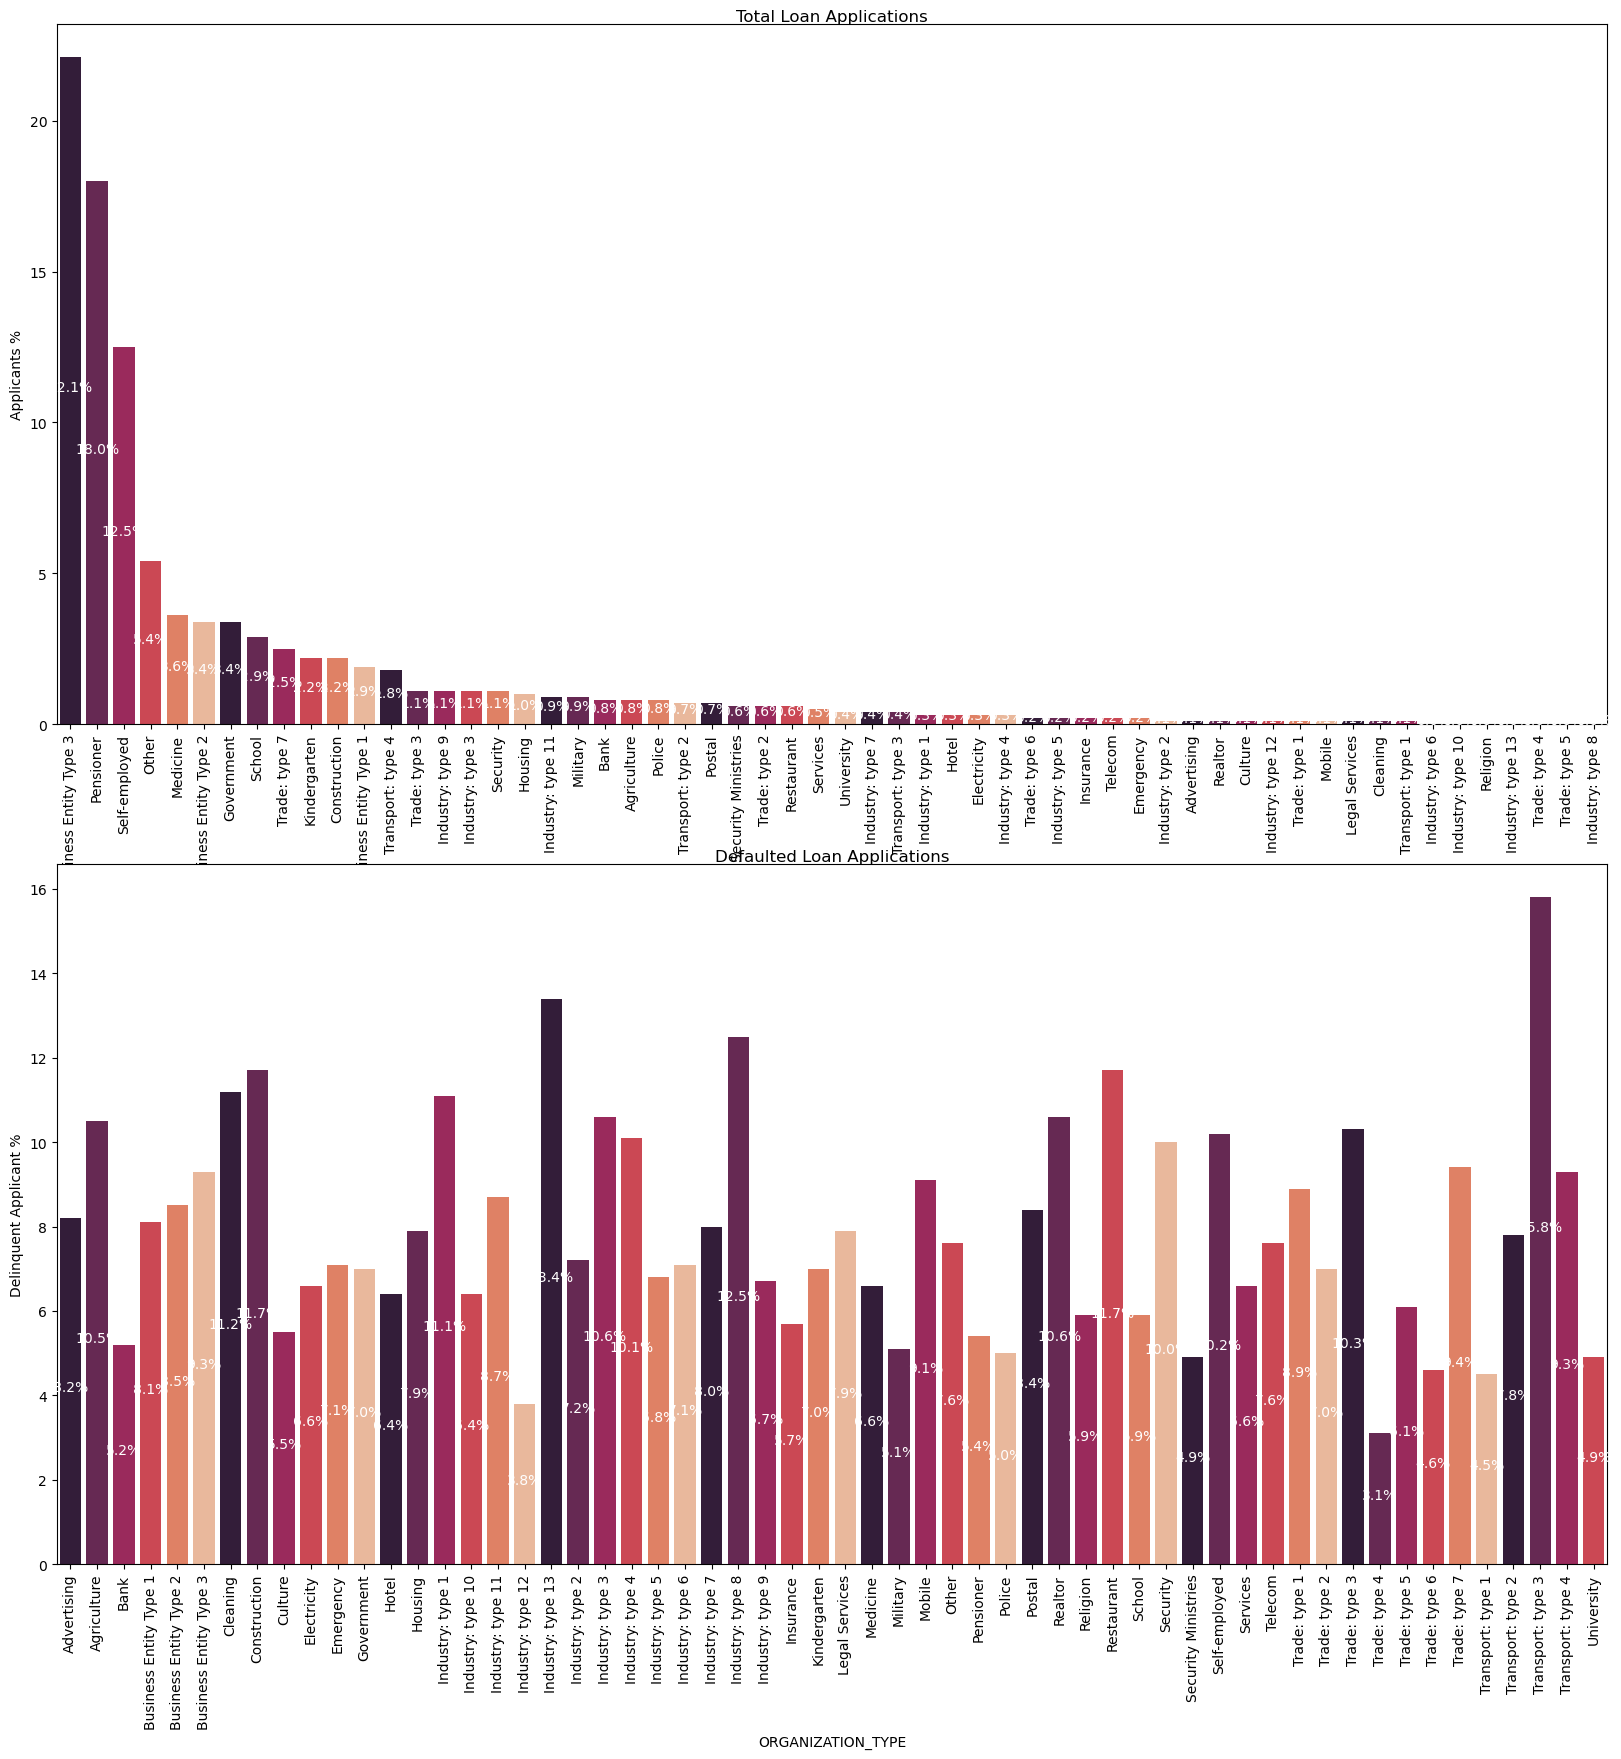

In [48]:
#Analysing Type of Organisation where applicant works ('ORGANIZATION_TYPE')
bargraph('ORGANIZATION_TYPE',rot_req=True , narrow=False)

#### Observations :
- No. of Applications received from Buiness Entity Type-3 is highest(22%+) followed by pensioners and Self-Employed @18% and 13% respectively.
- Highest Loan default is from Transport Type-3 @16% followed by Industry Type-13 and industry Type-8 close to 13%

#### Univariate Analysis of Continous Values
- AMT_ANNUITY, AMT_CREDIT, AMT_GOODS_PRICE, AMT_INCOME_TOTAL

In [49]:
# Create a customised function to create distribution plot for analysing continuous variables
def distgraph(col):

    plt.figure(figsize = [15,7])
    plt.subplot(1,2,1)
    plt.yscale('linear') 
    sns.distplot(df_ad[col],kde=False, hist=True, bins=30)
    plt.xlabel(col)
    plt.ylabel("Frequency")
    
    plt.subplot(1,2,2)
    plt.yscale('linear') 
    sns.distplot(df_Ndflt[col], kde=False, hist=True, bins=30, label = 'Non-Defaulters')
    sns.distplot(df_dflt[col],kde=False, hist=True, bins=30, label= 'Defaulters')
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.legend()
    plt.show()
    

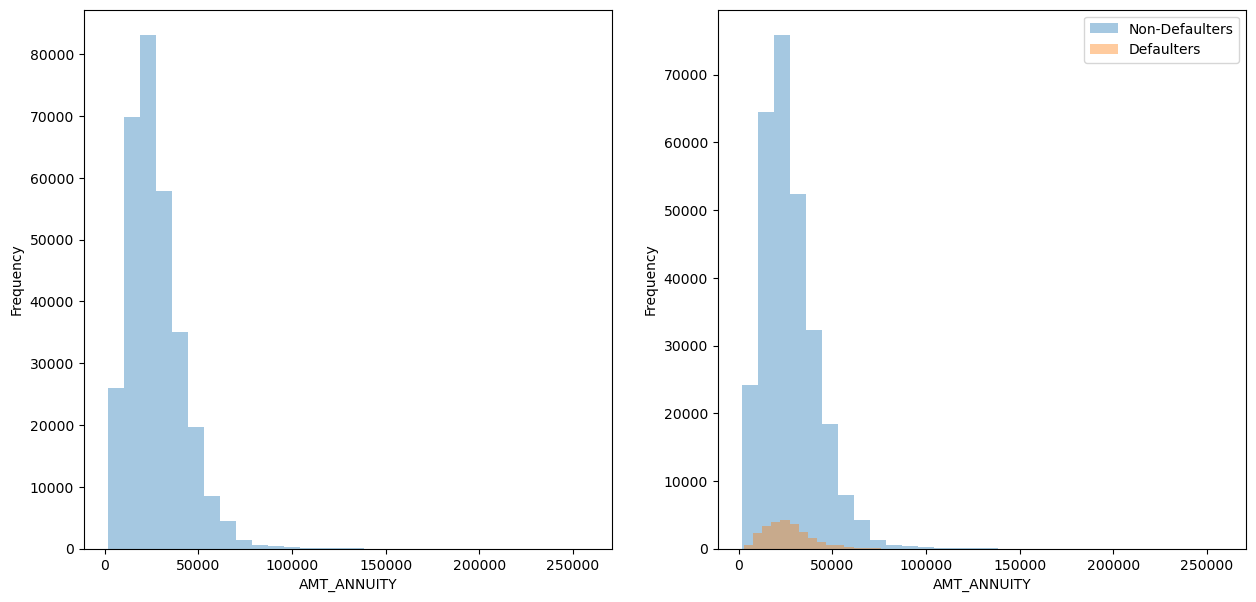

In [50]:
#Analysing distribution of Loan Annuity amount 
distgraph('AMT_ANNUITY')


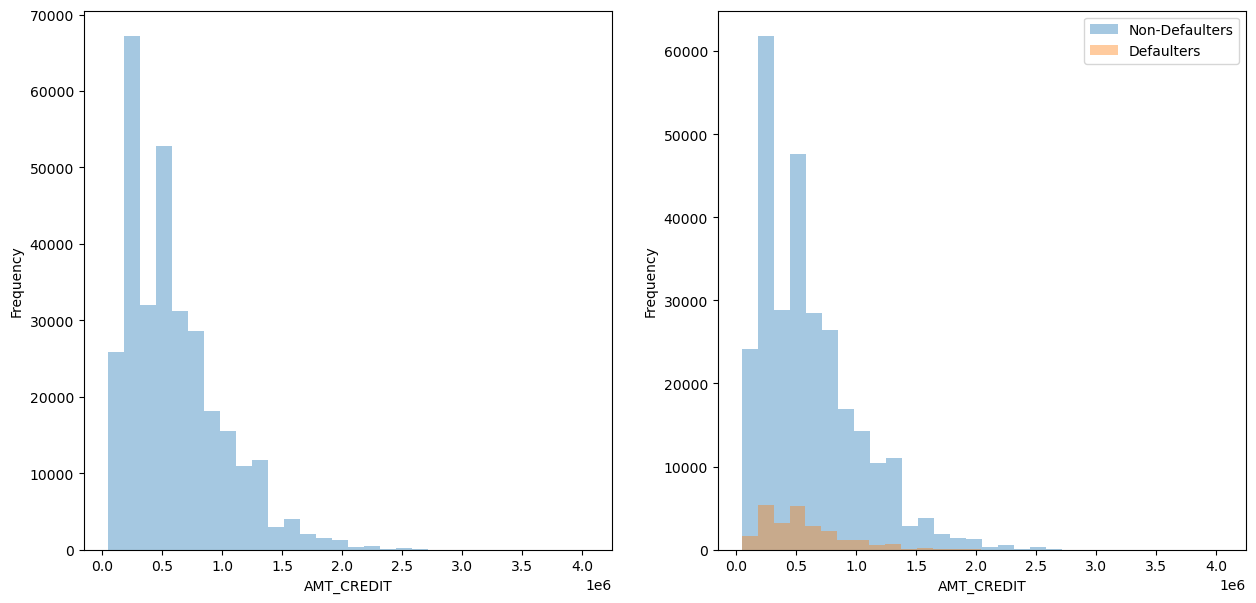

In [51]:
#Analysing distribution of Credit Amount 
distgraph('AMT_CREDIT')

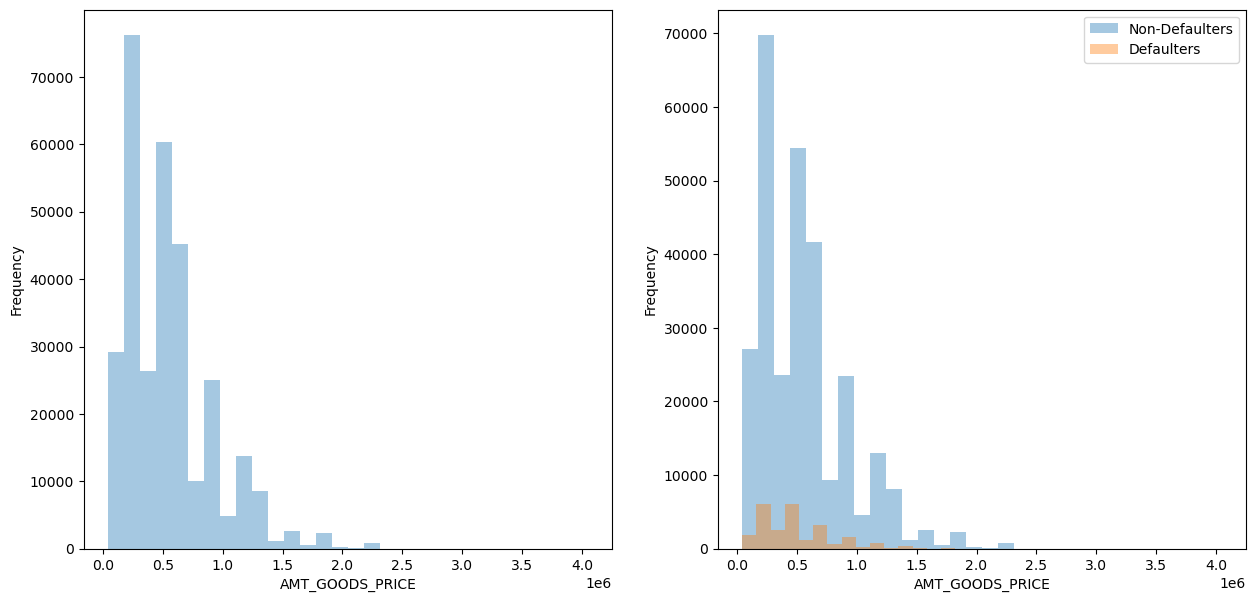

In [52]:
#Analysing distribution of Price of Goods for which Credit was given
distgraph('AMT_GOODS_PRICE')

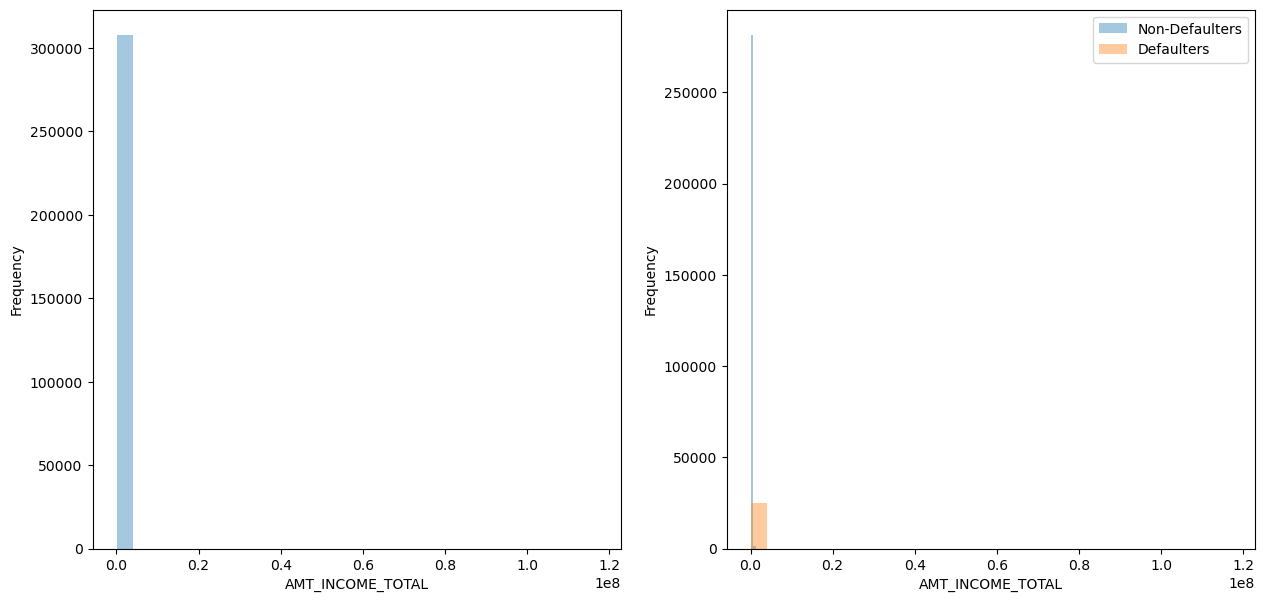

In [53]:
#Analysing Distribution of Income of the client.
distgraph('AMT_INCOME_TOTAL')


#### Observations : 
- Annuity amount shows a simlar distribution both for defaulters and No-Defaulters and is concentrated around 10000-50000 range.
- Credit amount of the loan shows a simlar distribution both for defaulters and No-Defaulters and is concentrated around 100000-1100000 range.
- The amount of goods for which the clients have received loan are mostly concentrated between 100000-1400000.
- The income of clients of both types mostly lies below 600000.

#### Inferences :
- The Default % is highest between a range of :-
    - Ammnuity amount : 10000-40000.
    - Credit amount : 150000-650000.
    - Amount of Goods : 300000-500000.
    - income of Client : 25000-600000
- It should be preffered to give loans above 650000 , to a client whose income is more than 600000.

## Bivariate Analysis 

### Continous-Continous Bivariate Analysis

<Figure size 2000x1500 with 0 Axes>

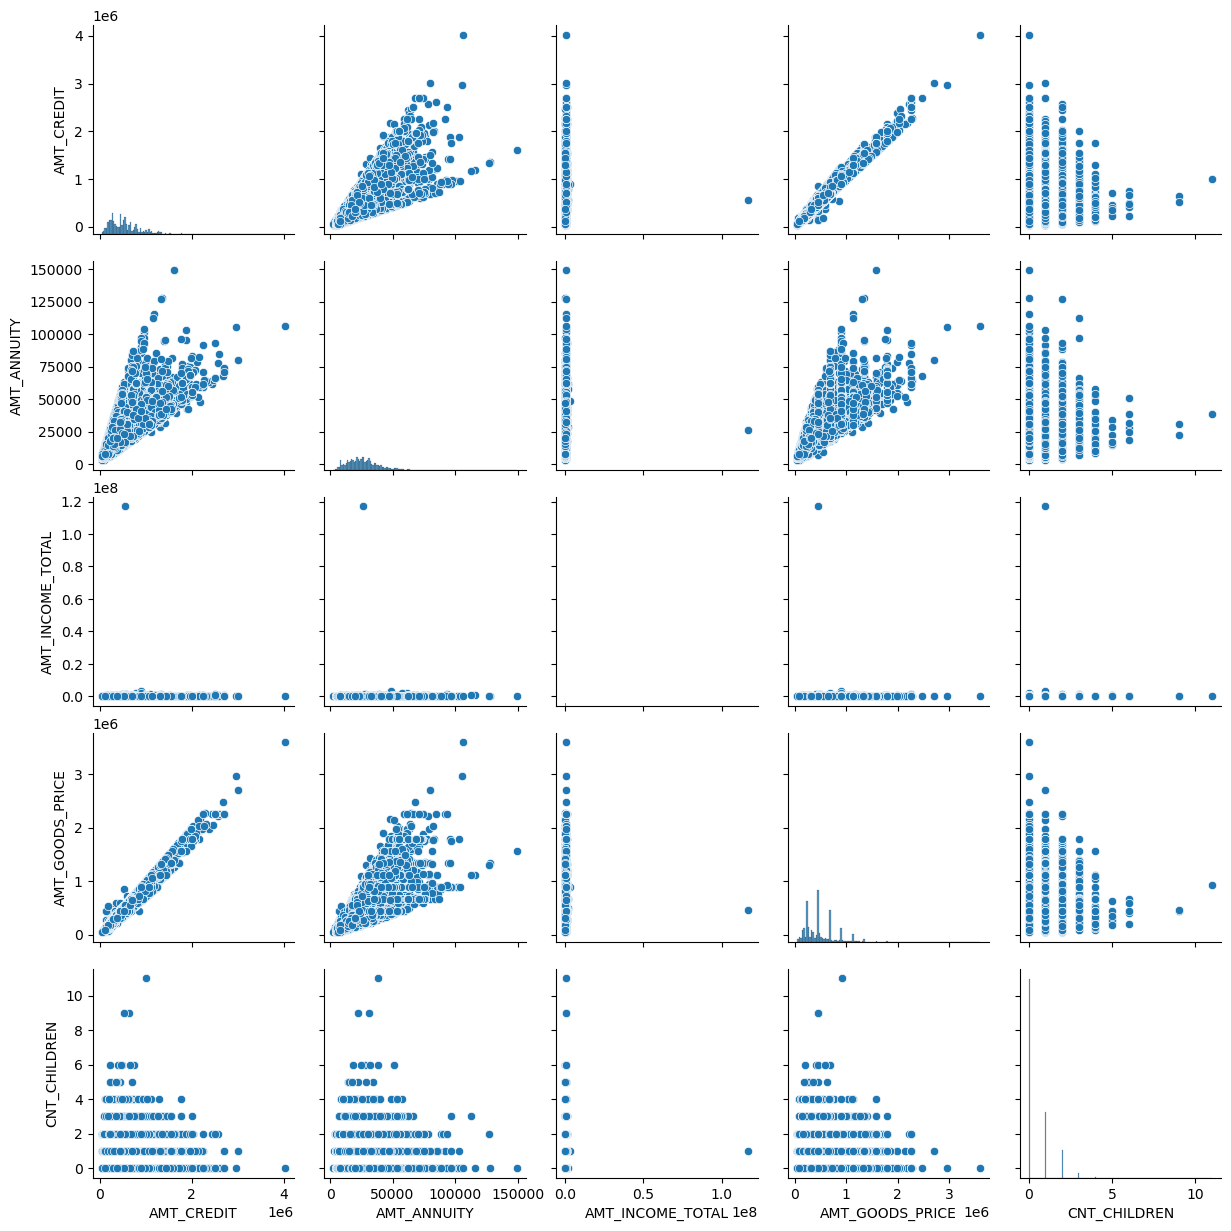

In [54]:
#Using Pair Plots to conduct Bivariate analysis between two continous variables

## Using pair Plot for default data frame
plt.figure(figsize=(20,15))
df_dflt_numcol = df_dflt[['AMT_CREDIT', 'AMT_ANNUITY', 'AMT_INCOME_TOTAL', 'AMT_GOODS_PRICE','CNT_CHILDREN']].fillna(0)
sns.pairplot(df_dflt_numcol)

plt.show()

<Figure size 2000x1500 with 0 Axes>

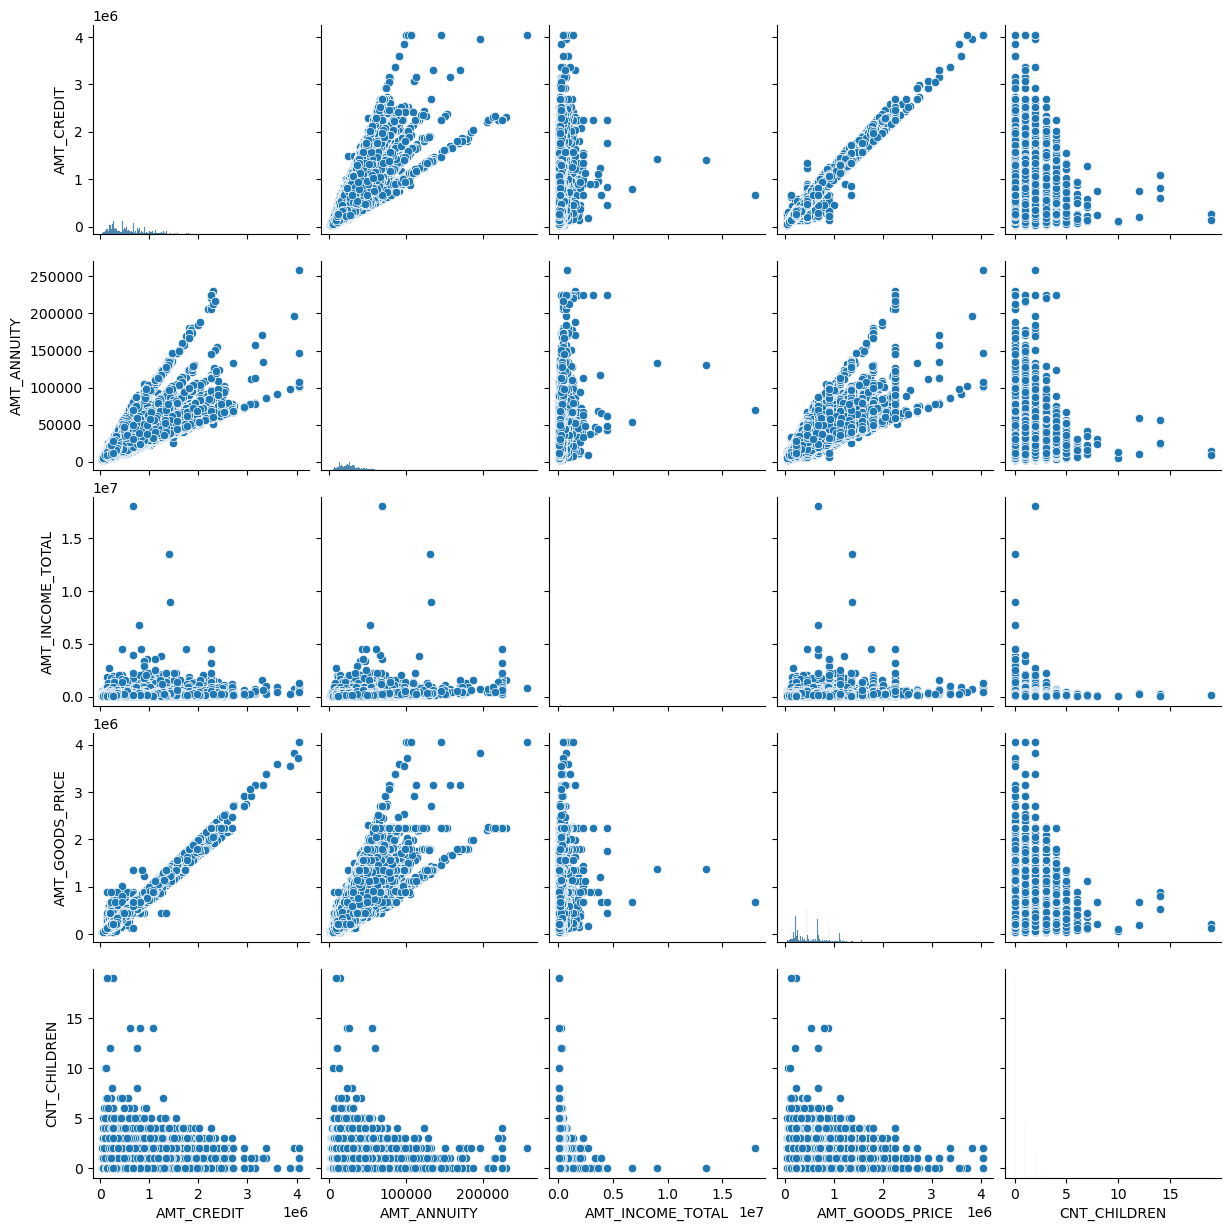

In [55]:
## Using pair Plot for Non-default data frame
plt.figure(figsize=(20,15))
df_Ndflt_numcol = df_Ndflt[['AMT_CREDIT', 'AMT_ANNUITY', 'AMT_INCOME_TOTAL', 'AMT_GOODS_PRICE','CNT_CHILDREN']].fillna(0)
sns.pairplot(df_Ndflt_numcol)

plt.show()

### Observations : 
- AMT_CREDIT and AMT_GOODS_PRICE are highly correlated variables for both defaulters and non – defaulters. So as the goods price increases the loan amount also increases against the same.
- AMT_CREDIT and AMT_ANNUITY (EMI) are highly correlated variables for both defaulters and non – defaulters. So as the credit amount increases the annuity amount also increases which is logical

### Inferences : 
- All three variables AMT_CREDIT, AMT_GOODS_PRICE and AMT_ANNUITY are highly correlated for both defaulters and non-defaulters and with increase in one variable the other variable also increases

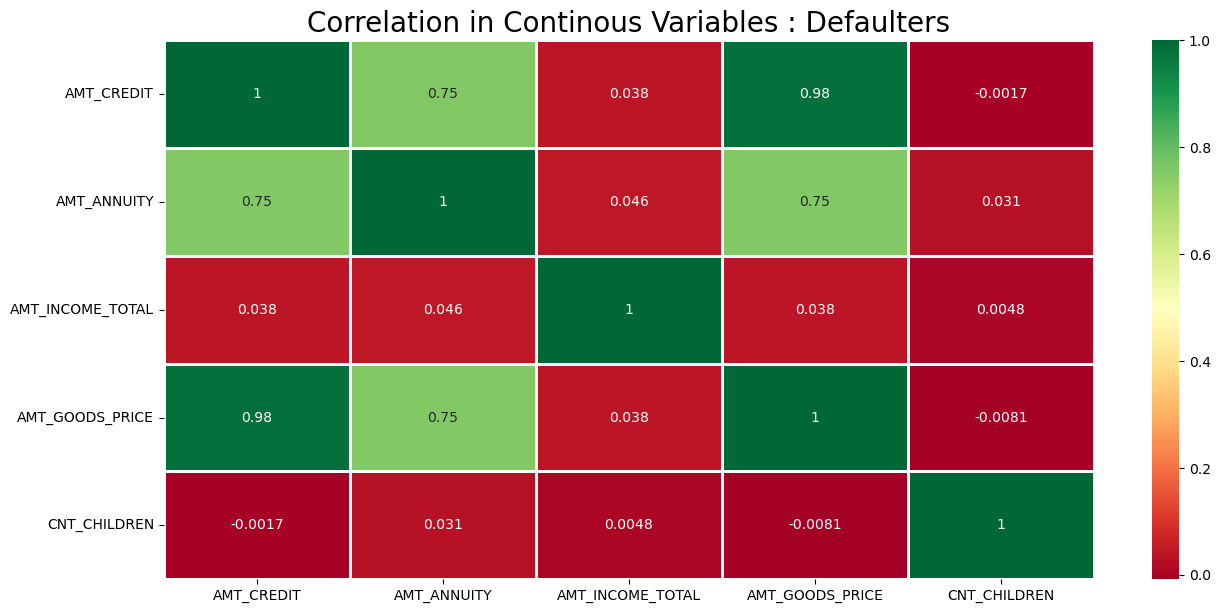

In [56]:
# create Heatmap to visualize the correlation between continous variables for Defaulters
plt.figure(figsize = [15,7])
sns.heatmap(df_dflt_numcol.corr(), annot= True, cmap= "RdYlGn", linewidths=2)
plt.title("Correlation in Continous Variables : Defaulters",fontdict={"fontsize": 20} )
plt.show()

#### Observations & Inferences 
- Amount Goods price and Credit Amount have highest co-relation of 0.98, which must be because the credit taken should have been equal to price of the goods.
- Amount Goods price & Annuity amount, Credit amount & Annuity amount have a correlation of 0.75. Reason is that the annuity amount is decided on the basis of Credit amount and credit amount is based on amount of goods price.
- Correlation between income amount and Credit Amount is very less (0.038) , which means the people who defaulted on loan do not have income inline with credit amount and hence the payment defaults.


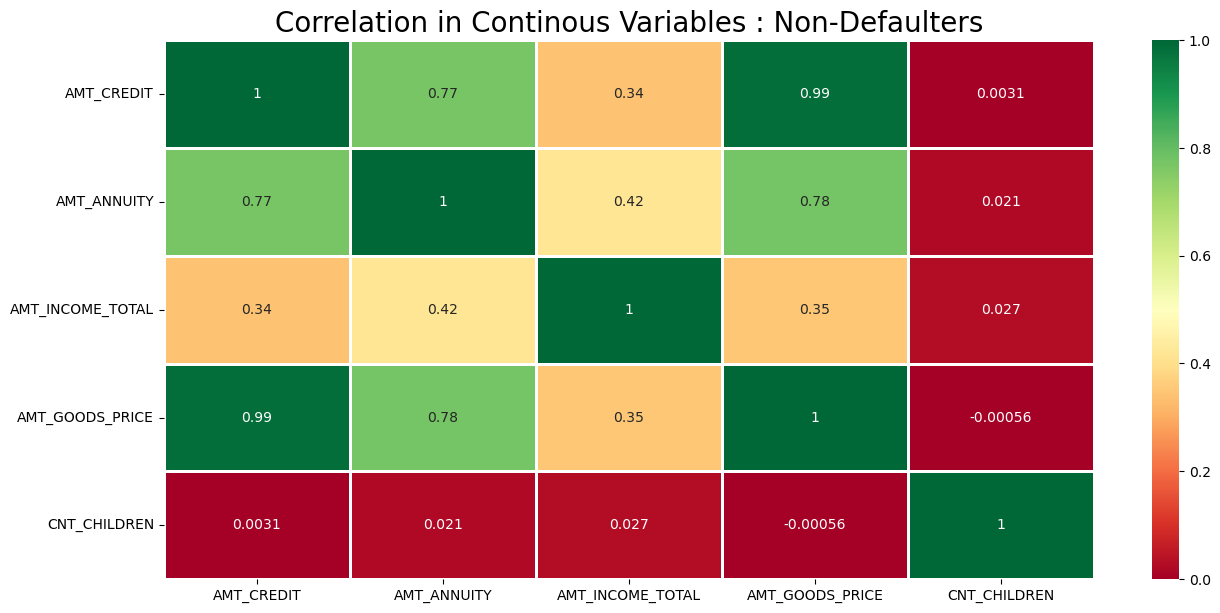

In [57]:
# create Heatmap to visualize the correlation between continous variables for Non-Defaulters
plt.figure(figsize = [15,7])
sns.heatmap(df_Ndflt_numcol.corr(), annot= True, cmap= "RdYlGn", linewidths=2)
plt.title("Correlation in Continous Variables : Non-Defaulters",fontdict={"fontsize": 20} )
plt.show()

#### Observations & Inferences 
- Amount Goods price and Credit Amount have highest co-relation of 0.99, which must be because the credit taken should have been equal to price of the goods.
- Credit amount & Annuity amount have a correlation of 0.77, because annuity is decided on the basis of credit amount.
- Amount Goods price & Annuity amount have a positive correlation of 0.78. Reason is that the annuity amount is decided on the basis of Credit amount and credit amount is based on amount of goods price as mentioned above.
- Correlation between income amount and annuity Amount is moderate (0.42) and income amount vs amount credit is also (0.34), which means the credit amount goes up inline with income and that's the reason for timely repayment.

### Continous-Categorical Bivariate Analysis

In [58]:
# Use Boxplot to do this kind of analysis
# Creating a customised function to create a boxplot with 2 such variables
# Continous variables will be AMT_INCOME_TOTAL and AMT_GOODS_PRICE

def boxplot (col_cat_var, rot_req=False, Vorient=True):
    
    if Vorient:
        plt.figure(figsize=[15,7])   
        plt.subplot(1,2,1)
        plt.yscale('log')
        ax=sns.boxplot(data=df_ad, x=col_cat_var,y='AMT_INCOME_TOTAL', hue='TARGET')
        plt.xlabel(col_cat_var)
        plt.ylabel("AMT_INCOME_TOTAL")
        plt.title(col_cat_var+" vs AMT_INCOME_TOTAL",pad=2)
        if rot_req:
            plt.xticks(rotation = 90)
        plt.subplot(1,2,2)
        ax=sns.boxplot(data=df_ad, x=col_cat_var,y='AMT_CREDIT', hue='TARGET')
        plt.xlabel(col_cat_var)
        plt.ylabel("AMT_CREDIT")
        plt.title(col_cat_var+" vs AMT_CREDIT",pad=2)
        if rot_req:
            plt.xticks(rotation = 90)
        plt.show()
    else :
        plt.figure(figsize=[15,7])   
        plt.subplot(1,2,1)
        plt.yscale('log')
        ax=sns.boxplot(data=df_ad, y=col_cat_var,x='AMT_INCOME_TOTAL',orient="h", hue='TARGET')
        plt.xlabel(col_cat_var)
        plt.ylabel("AMT_INCOME_TOTAL")
        plt.title(col_cat_var+" vs AMT_INCOME_TOTAL",pad=2)
        if rot_req:
            plt.xticks(rotation = 90)

        plt.subplot(1,2,2)
        ax=sns.boxplot(data=df_ad, y=col_cat_var,x='AMT_CREDIT', orient="h",hue='TARGET')
        plt.xlabel(col_cat_var)
        plt.ylabel("AMT_CREDIT")
        plt.title(col_cat_var+" vs AMT_CREDIT",pad=2)
        if rot_req:
            plt.xticks(rotation = 90)
        plt.show()

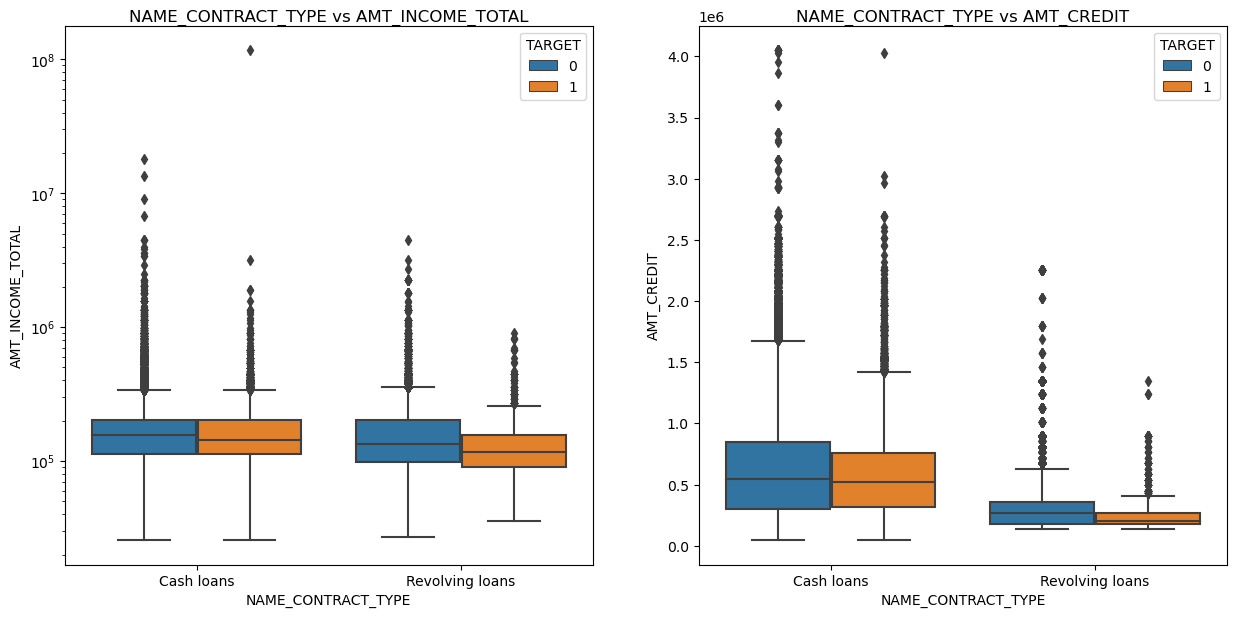

In [59]:
# Analysing categorical('NAME_CONTRACT_TYPE') vs Continous Column
boxplot('NAME_CONTRACT_TYPE')

#### Observation & Inference ;
- Total income is mostly for defaulters and non-defaulters for cash loan as the IQR is similar.
- The median for Total income of defaulters is lesser then Non-Defaulters for revolving loans.
- Credit amount is higher for cash loan compared to revolving loans.
- Credit amount is lower for defaulters as credit amount is concentrated in lower end of IQR.


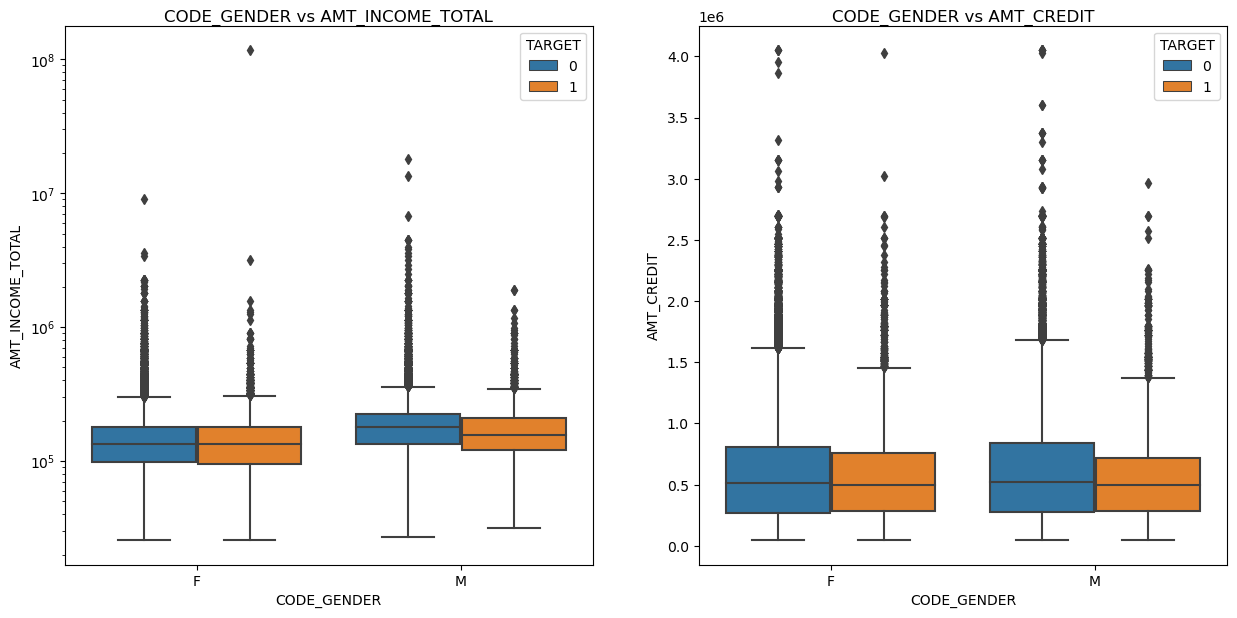

In [60]:
# Analysing categorical('CODE_GENDER') vs Numerical column
boxplot('CODE_GENDER')

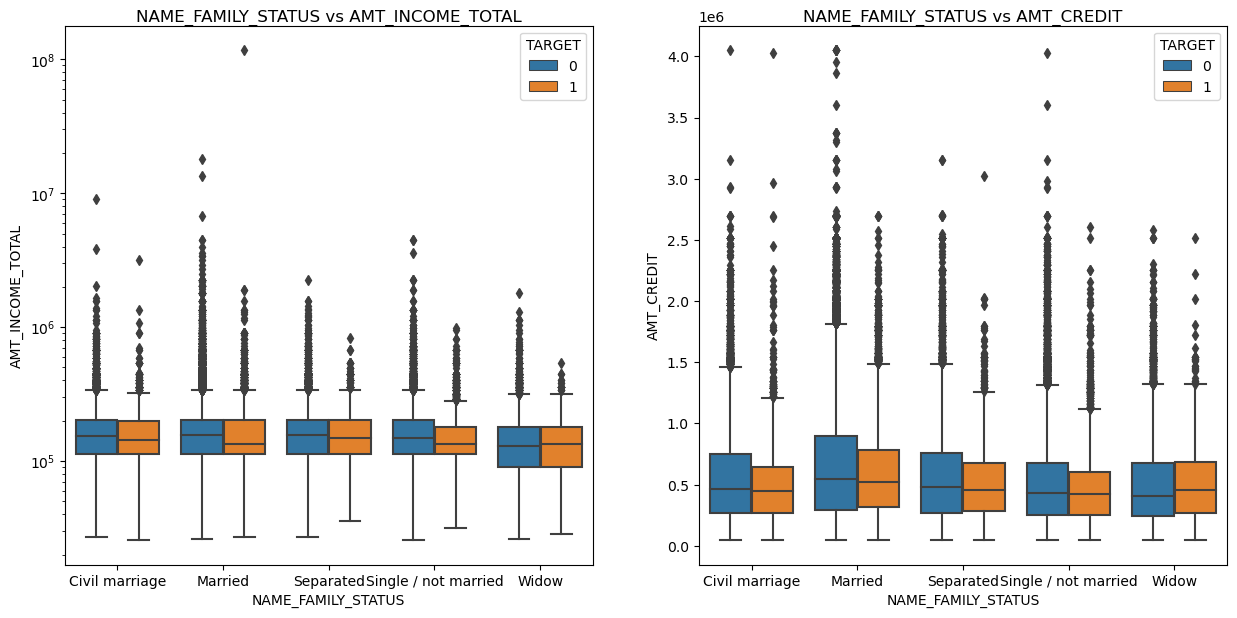

In [61]:
# Analysing categorical('NAME_FAMILY_STATUS') vs Numerical column
boxplot('NAME_FAMILY_STATUS')

#### Observations :
- All family types have mostly similar income as the IQR is mostly the same.
- Defaulters in Single and Not/married have lower Income compared to Non-Defaulters.
- Credit Amount for the married family status is higher than the rest.
- Amount of credit is smaller for all the defaulters vs No-Defaulters in all family Status except Widow, whre the credit amount is higher.


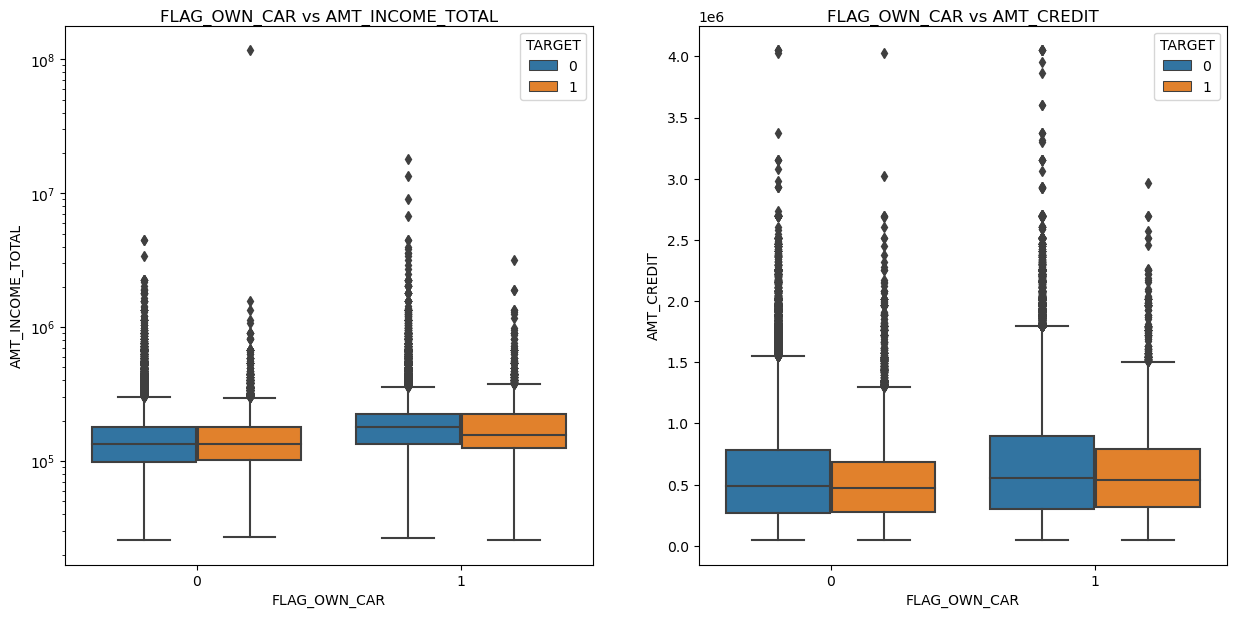

In [62]:
# Analysing categorical('FLAG_OWN_CAR') vs Numerical column
boxplot('FLAG_OWN_CAR')

#### Observation :
- Applicants who own a car have higher income.
- Both Defaulter or Non-Defaulter have similar income out of the aplicants who doesnt own a car.
- Credit amount is similar for both category , applicants who owns or doesnt own a car.


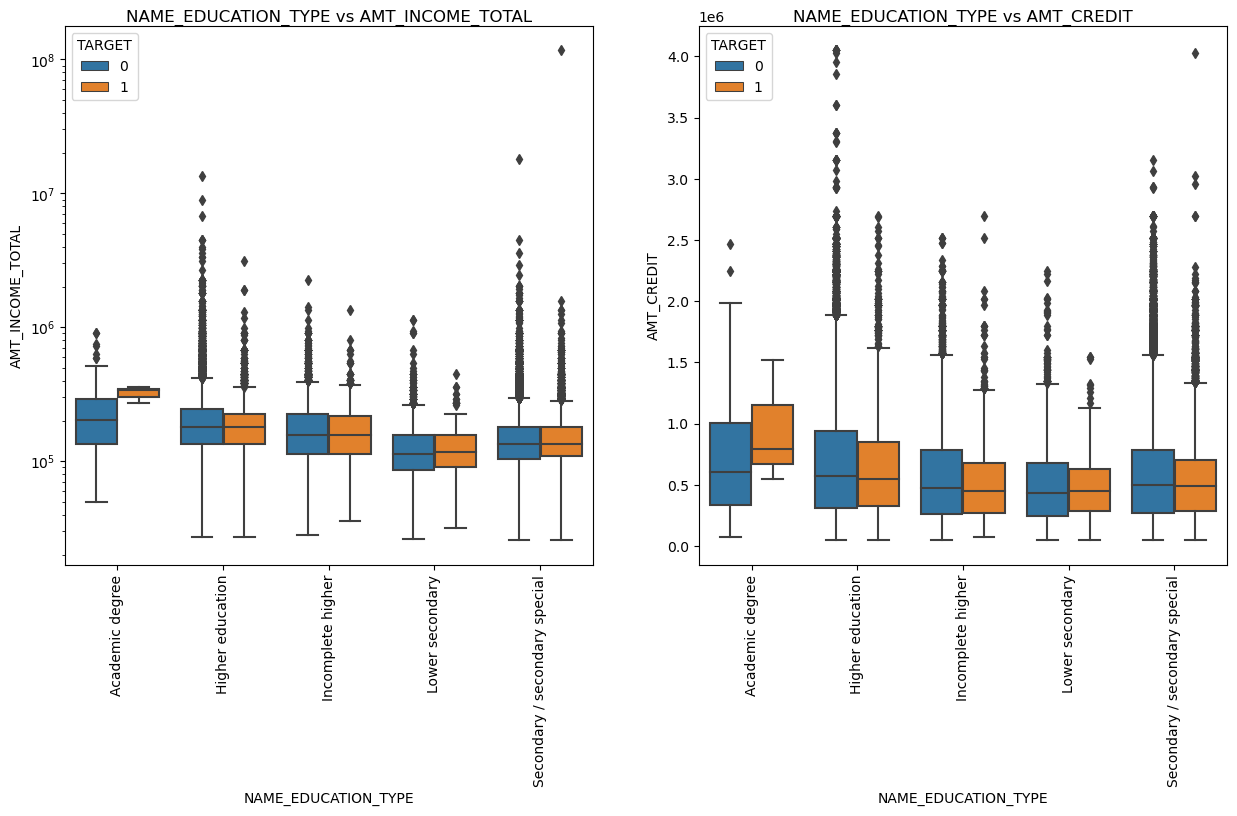

In [63]:
# Analysing categorical('NAME_EDUCATION_TYPE') vs Numerical column
boxplot('NAME_EDUCATION_TYPE', rot_req=True)

#### Observations : 
- Income Amount of Defaulters with academic degree is higher
- Credit amount of Defaulters with acedamic degree is higher.

## Merging the Bureau data with Application data

In [64]:
# Removing the columns with null values more than 50%
Previous_data_null = (df_bu.isnull().sum()/len(df_bu))*100
Previous_data_null
df_bu.drop(Previous_data_null[Previous_data_null.values>=50].index, axis = 1, inplace = True)
# Merging the data 
df_merged = df_ad.merge(df_bu, on= 'SK_ID_CURR', how = 'inner')

In [65]:
df_merged.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE
0,100002,1,Cash loans,M,0,1,0,202500.0,406597.5,24700.5,...,0,-1038.0,-1038.0,0,40761.0,NaN,NaN,0.0,Credit card,-1038
1,100002,1,Cash loans,M,0,1,0,202500.0,406597.5,24700.5,...,0,NaN,-48.0,0,0.0,0.0,NaN,0.0,Credit card,-47
2,100002,1,Cash loans,M,0,1,0,202500.0,406597.5,24700.5,...,0,-1072.0,-1185.0,0,135000.0,0.0,0.0,0.0,Consumer credit,-1185
3,100002,1,Cash loans,M,0,1,0,202500.0,406597.5,24700.5,...,0,-911.0,-911.0,0,19071.0,NaN,NaN,0.0,Consumer credit,-906
4,100002,1,Cash loans,M,0,1,0,202500.0,406597.5,24700.5,...,0,85.0,-36.0,0,120735.0,0.0,0.0,0.0,Consumer credit,-34


In [66]:
#Change the data type of all object type columns into category type to save memomry, improve processing time etc.
cat_col_merged = list(df_merged.select_dtypes(['object']).columns)
df_merged.loc[:,cat_col_merged]

,CREDIT_ACTIVE,CREDIT_CURRENCY,CREDIT_TYPE
0,Closed,currency 1,Credit card
1,Closed,currency 1,Credit card
2,Closed,currency 1,Consumer credit
3,Closed,currency 1,Consumer credit
4,Closed,currency 1,Consumer credit
...,...,...,...
1465319,Active,currency 1,Consumer credit
1465320,Active,currency 1,Consumer credit
1465321,Closed,currency 1,Consumer credit
1465322,Closed,currency 1,Credit card


In [67]:
for i in cat_col_merged:
    df_merged[i]=df_merged[i].astype('category')


In [68]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1465324 entries, 0 to 1465323
Data columns (total 55 columns):
 #   Column                       Non-Null Count    Dtype   
---  ------                       --------------    -----   
 0   SK_ID_CURR                   1465324 non-null  int64   
 1   TARGET                       1465324 non-null  int64   
 2   NAME_CONTRACT_TYPE           1465324 non-null  category
 3   CODE_GENDER                  1465324 non-null  category
 4   FLAG_OWN_CAR                 1465324 non-null  int64   
 5   FLAG_OWN_REALTY              1465324 non-null  int64   
 6   CNT_CHILDREN                 1465324 non-null  int64   
 7   AMT_INCOME_TOTAL             1465324 non-null  float64 
 8   AMT_CREDIT                   1465324 non-null  float64 
 9   AMT_ANNUITY                  1465324 non-null  float64 
 10  AMT_GOODS_PRICE              1465324 non-null  float64 
 11  NAME_TYPE_SUITE              1465324 non-null  category
 12  NAME_INCOME_TYPE            

In [69]:
#Droppping Column DAYS_ENDDATE_FACT as it doesnt seem so relevant for this analysis
df_merged.drop('DAYS_ENDDATE_FACT', axis=1, inplace=True)

In [70]:
#Imputing the null values with median for below numerical columns
df_merged.AMT_CREDIT_SUM_LIMIT.fillna( df_merged.AMT_CREDIT_SUM_LIMIT.median(),inplace = True)
df_merged.AMT_CREDIT_SUM_DEBT.fillna( df_merged.AMT_CREDIT_SUM_DEBT.median(),inplace = True)
df_merged.DAYS_CREDIT_ENDDATE.fillna( df_merged.DAYS_CREDIT_ENDDATE.median(),inplace = True)
df_merged.AMT_CREDIT_SUM.fillna( df_merged.AMT_CREDIT_SUM.median(),inplace = True)

## Feature Engineering

### Working with Categorical Columns

In [71]:
df_Merged_cat_col = df_merged.select_dtypes("category")
df_Merged_cat_col.apply(pd.Series.nunique)

NAME_CONTRACT_TYPE      2
CODE_GENDER             2
NAME_TYPE_SUITE         7
NAME_INCOME_TYPE        8
NAME_EDUCATION_TYPE     5
NAME_FAMILY_STATUS      5
NAME_HOUSING_TYPE       6
OCCUPATION_TYPE        19
ORGANIZATION_TYPE      58
CREDIT_ACTIVE           4
CREDIT_CURRENCY         4
CREDIT_TYPE            15
dtype: int64

In [72]:
# creating Dummies for CODE_GENDER, NAME_CONTRACT_TYPE into numerical values as their cardinality level is only 2

#pd.get_dummies(df_merged, columns= ['NAME_CONTRACT_TYPE','CODE_GENDER'], prefix=['LoanType','GENDER'], drop_first=True)
#df_merged.drop(['NAME_CONTRACT_TYPE','CODE_GENDER'],axis=1, inplace=True)

In [73]:
# Binary Mapping for converting categoraical variable into number
df_merged['CODE_GENDER'] = df_merged['CODE_GENDER'].map(lambda x: 1 if x == "M" else 0)
df_merged.CODE_GENDER.value_counts()

0    1001580
1     463744
Name: CODE_GENDER, dtype: int64

In [74]:
df_merged['NAME_CONTRACT_TYPE'] = df_merged['NAME_CONTRACT_TYPE'].map(lambda x: 1 if x =="Cash loans" else 0)
df_merged.NAME_CONTRACT_TYPE.value_counts()

1    1339738
0     125586
Name: NAME_CONTRACT_TYPE, dtype: int64

In [75]:
#Handling columns with higher Cardinality using mean encoding
cat_col_list = ['NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE', 'ORGANIZATION_TYPE',
       'CREDIT_ACTIVE', 'CREDIT_CURRENCY', 'CREDIT_TYPE']

#df_dummies = pd.get_dummies(df_merged[cat_col_list], drop_first=True)
#df_dummies.columns

for i in cat_col_list:
        map_mean = df_merged.groupby(i)['TARGET'].mean()
        map_mean
        df_merged[i] = df_merged[i].map(map_mean)

In [76]:
df_merged[cat_col_list].head()

,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,OCCUPATION_TYPE,ORGANIZATION_TYPE,CREDIT_ACTIVE,CREDIT_CURRENCY,CREDIT_TYPE
0,0.078966,0.090153,0.08646,0.08787,0.075726,0.099539,0.090132,0.069311,0.078174,0.088009
1,0.078966,0.090153,0.08646,0.08787,0.075726,0.099539,0.090132,0.069311,0.078174,0.088009
2,0.078966,0.090153,0.08646,0.08787,0.075726,0.099539,0.090132,0.069311,0.078174,0.074837
3,0.078966,0.090153,0.08646,0.08787,0.075726,0.099539,0.090132,0.069311,0.078174,0.074837
4,0.078966,0.090153,0.08646,0.08787,0.075726,0.099539,0.090132,0.069311,0.078174,0.074837


In [77]:
#Change the data type of all category type columns into float type
cat_col = list(df_merged.select_dtypes(['category']).columns)
cat_col
for i in cat_col:
    df_merged[i]=df_merged[i].astype('float64')
    
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1465324 entries, 0 to 1465323
Data columns (total 54 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_CURR                   1465324 non-null  int64  
 1   TARGET                       1465324 non-null  int64  
 2   NAME_CONTRACT_TYPE           1465324 non-null  float64
 3   CODE_GENDER                  1465324 non-null  float64
 4   FLAG_OWN_CAR                 1465324 non-null  int64  
 5   FLAG_OWN_REALTY              1465324 non-null  int64  
 6   CNT_CHILDREN                 1465324 non-null  int64  
 7   AMT_INCOME_TOTAL             1465324 non-null  float64
 8   AMT_CREDIT                   1465324 non-null  float64
 9   AMT_ANNUITY                  1465324 non-null  float64
 10  AMT_GOODS_PRICE              1465324 non-null  float64
 11  NAME_TYPE_SUITE              1465324 non-null  float64
 12  NAME_INCOME_TYPE             1465324 non-n

# Model building
 - Dividing into train and test sets
 - MinMax scaling for numeric features
 - build multiple predictive models


### Test-Train Split

In [78]:
### Train-test split 

from sklearn.model_selection import train_test_split

df_train, df_test = train_test_split(df_merged, random_state=42)

df_train.shape, df_test.shape

((1098993, 54), (366331, 54))

### Working with the numerical variables

In [79]:
df_train.describe()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE
count,1.098993e+06,1.098993e+06,1.098993e+06,1.098993e+06,1.098993e+06,1.098993e+06,1.098993e+06,1.098993e+06,1.098993e+06,1.098993e+06,...,1.098993e+06,1.098993e+06,1.098993e+06,1.098993e+06,1.098993e+06,1.098993e+06,1.098993e+06,1.098993e+06,1.098993e+06,1.098993e+06
mean,2.782041e+05,7.808876e-02,9.139676e-01,3.163960e-01,3.629650e-01,6.941109e-01,4.251210e-01,1.807440e+05,6.235116e+05,2.744221e+04,...,-1.143298e+03,8.785161e-01,4.478178e+02,7.376753e-03,3.520936e+05,1.151806e+05,4.254329e+03,3.539052e+01,7.815159e-02,-5.992233e+02
std,1.029261e+05,2.683113e-01,2.804120e-01,4.650696e-01,4.808551e-01,4.607832e-01,7.240585e-01,2.492229e+05,4.089476e+05,1.421998e+04,...,7.998526e+02,3.811850e+01,4.828873e+03,1.034583e-01,1.083243e+06,6.121891e+05,3.715028e+04,5.468480e+03,1.225065e-02,7.357032e+02
min,1.000020e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.610000e+04,4.500000e+04,1.615500e+03,...,-2.922000e+03,0.000000e+00,-4.206000e+04,0.000000e+00,0.000000e+00,-4.705600e+06,-4.013469e+05,0.000000e+00,0.000000e+00,-4.194700e+04
25%,1.887350e+05,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.125000e+05,2.844000e+05,1.687500e+04,...,-1.670000e+03,0.000000e+00,-1.078000e+03,0.000000e+00,5.122350e+04,0.000000e+00,0.000000e+00,0.000000e+00,7.483662e-02,-9.030000e+02
50%,2.781980e+05,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,1.575000e+05,5.387040e+05,2.534850e+04,...,-9.850000e+02,0.000000e+00,-3.340000e+02,0.000000e+00,1.247670e+05,0.000000e+00,0.000000e+00,0.000000e+00,7.483662e-02,-4.050000e+02
75%,3.673350e+05,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,2.250000e+05,8.356050e+05,3.513150e+04,...,-4.690000e+02,0.000000e+00,3.890000e+02,0.000000e+00,3.105000e+05,9.630000e+02,0.000000e+00,0.000000e+00,7.483662e-02,-3.300000e+01
max,4.562550e+05,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.900000e+01,1.170000e+08,4.050000e+06,2.580255e+05,...,0.000000e+00,2.792000e+03,3.119800e+04,9.000000e+00,3.960000e+08,1.701000e+08,4.705600e+06,3.756681e+06,2.352941e-01,3.720000e+02


In [80]:
num_col = list(df_train.select_dtypes(['number']).columns)
num_col

['SK_ID_CURR',
 'TARGET',
 'NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'REGION_POPULATION_RELATIVE',
 'AGE',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'FLAG_MOBIL',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'OCCUPATION_TYPE',
 'CNT_FAM_MEMBERS',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'ORGANIZATION_TYPE',
 'OBS_30_CNT_SOCIAL_CIRCLE',
 'DEF_30_CNT_SOCIAL_CIRCLE',
 'OBS_60_CNT_SOCIAL_CIRCLE',
 'DEF_60_CNT_SOCIAL_CIRCLE',
 'AMT_REQ_CREDIT_BUREAU_DAY',
 'AMT_REQ_CREDIT_BUREAU_WEEK',
 'AMT_REQ_CREDIT_BUREAU_MON',
 'AMT_REQ_CREDIT_BUREAU_QRT',
 'AMT_REQ_CREDIT_BUREAU_YEAR',
 'SK_ID_BUREAU',
 'CREDIT_ACTIVE',
 'CREDIT_CURRENCY',
 'DAYS_CREDIT',
 'CREDIT_DAY_OVERDUE',
 'DAYS_CREDIT_

In [81]:
df_train_new = df_train.copy()

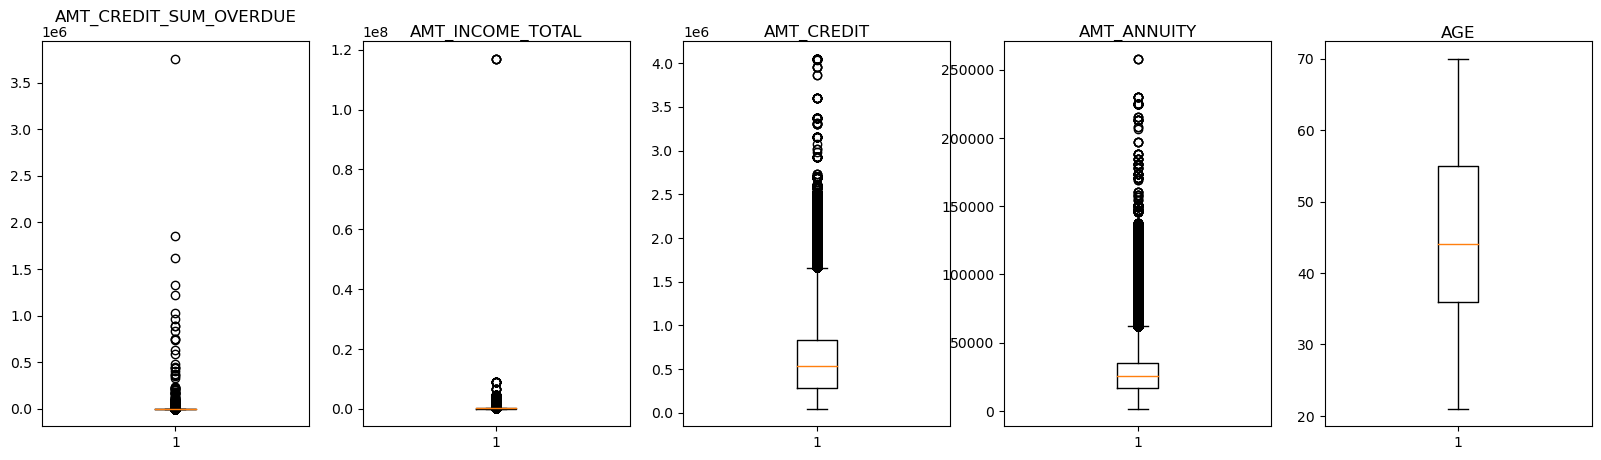

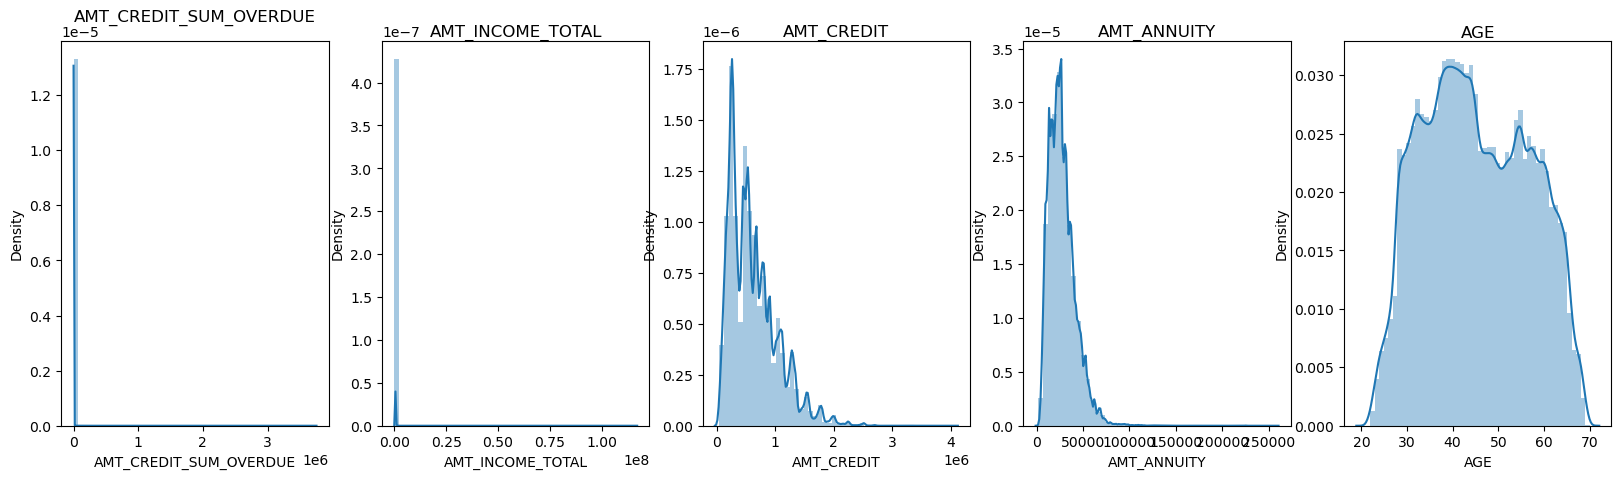

In [82]:

boxplot_col = ['AMT_CREDIT_SUM_OVERDUE','AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','AGE']
n=1
plt.figure(figsize=(20,5))
for col in boxplot_col:    
    plt.subplot(1,5,n) 
    plt.boxplot(df_train[col])
    plt.title(col, pad=2)
    n=n+1
n=1
plt.figure(figsize=(20,5))
for col in boxplot_col:    
    plt.subplot(1,5,n) 
    sns.distplot(df_train[col])
    plt.title(col, pad=2)
    n=n+1
plt.show()

In [83]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

df_train[['AMT_CREDIT_SUM_OVERDUE','AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','AGE']] = scaler.fit_transform(df_train[['AMT_CREDIT_SUM_OVERDUE','AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','AGE']])


In [85]:
df_test[['AMT_CREDIT_SUM_OVERDUE','AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','AGE']] = scaler.transform(df_test[['AMT_CREDIT_SUM_OVERDUE','AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','AGE']])

### Building predictive models

In [86]:
X_train = df_train.drop('TARGET', axis=1)
y_train = df_train['TARGET']
X_test = df_test.drop('TARGET', axis=1)
y_test = df_test['TARGET']

In [87]:
X_train.shape

(1098993, 53)

In [88]:
y_train.shape, y_test.shape


((1098993,), (366331,))

### Evaluation Metric

1. Accuracy =  TN+TP / TN+FP+FN+TP


2. Precision = TP / TP+FP


3. Recall = TP / TP+FN


4. F1 Score = 2 x (precision x recall) / (precision + recall)

In this problem we will use recall as evaluation metric because we would like to capture the performace where we will be rightly predicting positive classes, to identify the defaulters correctly.

## Beginning with Logistic Regression

##### Base

In [89]:
# Logistic Regression
from collections import Counter
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score

In [90]:
lreg = LogisticRegression()
lreg.fit(X_train, y_train)

LogisticRegression()

In [91]:
y_pred = lreg.predict(X_test)

In [92]:
print ('Recall: ', recall_score(y_test, y_pred))
results = pd.DataFrame({'Algorithm':['Logistics Regression'], 'Technique':['Base'],'Recall': recall_score(y_test, y_pred)})
#tempResults = pd.DataFrame({'Model':['Logistics Regression'], 'Method':['Base'],'Recall': recall_score(y_test, y_pred)})
#results = pd.concat([results, tempResults])
results = results[['Algorithm', 'Technique', 'Recall']]
results

Recall:  3.484199156823804e-05


,Algorithm,Technique,Recall
0,Logistics Regression,Base,0.000035


- Recall is the key evaluation metric for us, but in this case it's very poor.
- That is majorly due to Class Imbalance of Target variable.


### Handling Class Imbalance

#### Will Use Different Class Imbalance Technique
- Base
- Random US
- Random OS
- SMOTE
- ADASYN
Due to Limitation of RAM on PC and size of the data, will not use Tomkek Links and Smote+Tomkek Technique

##### Random US

In [93]:
# Random Undersampling
from imblearn.under_sampling import RandomUnderSampler
under_sample = RandomUnderSampler(random_state = 5)
X_resampled_us, y_resampled_us = under_sample.fit_resample(X_train, y_train)

In [94]:
lreg_us = LogisticRegression()
lreg_us.fit(X_resampled_us, y_resampled_us)

y_pred_us = lreg_us.predict(X_test)

In [95]:
print ('Recall: ', recall_score(y_test, y_pred_us))
tempResults = pd.DataFrame({'Algorithm':['Logistics Regression'], 'Technique':['Random US'],'Recall': recall_score(y_test, y_pred_us)})
results = pd.concat([results, tempResults])
results = results[['Algorithm', 'Technique', 'Recall']]
results

Recall:  0.5641266854813421


,Algorithm,Technique,Recall
0,Logistics Regression,Base,0.000035
0,Logistics Regression,Random US,0.564127


#### Random OverSampling

In [96]:
# Random OverSampling
from imblearn.over_sampling import RandomOverSampler
over_sample = RandomOverSampler(sampling_strategy = 1)
X_resampled_os, y_resampled_os = over_sample.fit_resample(X_train, y_train)
len(X_resampled_os)

2026348

In [97]:
lreg_os = LogisticRegression()
lreg_os.fit(X_resampled_os, y_resampled_os)

y_pred_os = lreg_os.predict(X_test)

In [98]:
print ('Recall: ', recall_score(y_test, y_pred_os))
tempResults = pd.DataFrame({'Algorithm':['Logistics Regression'], 'Technique':['Random OS'],'Recall': recall_score(y_test, y_pred_os)})
results = pd.concat([results, tempResults])
results = results[['Algorithm', 'Technique', 'Recall']]
results

Recall:  0.5597714365353124


,Algorithm,Technique,Recall
0,Logistics Regression,Base,0.000035
0,Logistics Regression,Random US,0.564127
0,Logistics Regression,Random OS,0.559771


#### SMOTE

In [99]:
# SMOTE
from imblearn.over_sampling import SMOTE
smt = SMOTE(random_state=45, k_neighbors=5)
X_resampled_smt, y_resampled_smt = smt.fit_resample(X_train, y_train)
len(X_resampled_smt)

2026348

In [100]:
lreg_smt = LogisticRegression()
lreg_smt.fit(X_resampled_smt, y_resampled_smt)

y_pred_smt = lreg_smt.predict(X_test)

In [101]:
print ('Recall: ', recall_score(y_test, y_pred_smt))
tempResults = pd.DataFrame({'Algorithm':['Logistics Regression'], 'Technique':['SMOTE'],'Recall': recall_score(y_test, y_pred_smt)})
results = pd.concat([results, tempResults])
results = results[['Algorithm', 'Technique', 'Recall']]
results

Recall:  0.5667049928573917


,Algorithm,Technique,Recall
0,Logistics Regression,Base,0.000035
0,Logistics Regression,Random US,0.564127
0,Logistics Regression,Random OS,0.559771
0,Logistics Regression,SMOTE,0.566705


#### ADASYN

In [102]:
# ADASYN
from imblearn.over_sampling import ADASYN
ada = ADASYN(random_state=45, n_neighbors=5)
X_resampled_ada, y_resampled_ada = ada.fit_resample(X_train, y_train)
len(X_resampled_ada)

2016819

In [103]:
lreg_ada = LogisticRegression()
lreg_ada.fit(X_resampled_ada, y_resampled_ada)

y_pred_ada = lreg_ada.predict(X_test)

In [104]:
print ('Recall: ', recall_score(y_test, y_pred_ada))
tempResults = pd.DataFrame({'Algorithm':['Logistics Regression'], 'Technique':['ADASYN'],'Recall': recall_score(y_test, y_pred_ada)})
results = pd.concat([results, tempResults])
results = results[['Algorithm', 'Technique', 'Recall']]
results

Recall:  0.561618062088429


,Algorithm,Technique,Recall
0,Logistics Regression,Base,0.000035
0,Logistics Regression,Random US,0.564127
0,Logistics Regression,Random OS,0.559771
0,Logistics Regression,SMOTE,0.566705
0,Logistics Regression,ADASYN,0.561618


### Radom Forest

In [105]:
# Random Forest - Base
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)

In [106]:
print ('Recall: ', recall_score(y_test, y_pred_rf))
tempResults = pd.DataFrame({'Algorithm':['Random Forest'], 'Technique':['Base'],'Recall': recall_score(y_test, y_pred_rf)})
results = pd.concat([results, tempResults])
results = results[['Algorithm', 'Technique', 'Recall']]
results

Recall:  0.6145430472805825


,Algorithm,Technique,Recall
0,Logistics Regression,Base,0.000035
0,Logistics Regression,Random US,0.564127
0,Logistics Regression,Random OS,0.559771
0,Logistics Regression,SMOTE,0.566705
0,Logistics Regression,ADASYN,0.561618
0,Random Forest,Base,0.614543


In [107]:
# Random Forest - Random UnderSampling
rf_us = RandomForestClassifier()
rf_us.fit(X_resampled_us, y_resampled_us)

y_pred_rf_us = rf_us.predict(X_test)

In [108]:
print ('Recall: ', recall_score(y_test, y_pred_rf_us))
tempResults = pd.DataFrame({'Algorithm':['Random Forest'], 'Technique':['Random US'],'Recall': recall_score(y_test, y_pred_rf_us)})
results = pd.concat([results, tempResults])
results = results[['Algorithm', 'Technique', 'Recall']]
results

Recall:  0.9201421553255984


,Algorithm,Technique,Recall
0,Logistics Regression,Base,0.000035
0,Logistics Regression,Random US,0.564127
0,Logistics Regression,Random OS,0.559771
0,Logistics Regression,SMOTE,0.566705
0,Logistics Regression,ADASYN,0.561618
0,Random Forest,Base,0.614543
0,Random Forest,Random US,0.920142


In [109]:
# Random Forest - Random Over-Sampling
rf_os = RandomForestClassifier()
rf_os.fit(X_resampled_os, y_resampled_os)

y_pred_rf_os = rf_os.predict(X_test)

In [110]:
print ('Recall: ', recall_score(y_test, y_pred_rf_os))
tempResults = pd.DataFrame({'Algorithm':['Random Forest'], 'Technique':['Random OS'],'Recall': recall_score(y_test, y_pred_rf_os)})
results = pd.concat([results, tempResults])
results = results[['Algorithm', 'Technique', 'Recall']]
results

Recall:  0.7810529249851922


,Algorithm,Technique,Recall
0,Logistics Regression,Base,0.000035
0,Logistics Regression,Random US,0.564127
0,Logistics Regression,Random OS,0.559771
0,Logistics Regression,SMOTE,0.566705
0,Logistics Regression,ADASYN,0.561618
0,Random Forest,Base,0.614543
0,Random Forest,Random US,0.920142
0,Random Forest,Random OS,0.781053


As we can see above on the summary table, we have recall value highest for Random Forest with random undersampling.

So we will pick up random forest with undersampling method as best performing model. 

As a next step we do need to further fine tune the model by working on to optimize hyperparameters using grid search/ randomized search. Also, we need to do a 5 or 10 fold cross validation on the training set before finalizing the model.

### Model Evaluation : Cross Validation

In [111]:
from sklearn.model_selection import cross_val_score

In [112]:
cross_val_score(rf_us, X_resampled_us, y_resampled_us, n_jobs=-1, scoring="recall")

array([0.90596598, 0.90450944, 0.89932417, 0.89657985, 0.90142158])

In [113]:
cross_val_score(rf_us, X_resampled_us, y_resampled_us, n_jobs=-1, scoring="recall").mean()

0.900954310984756

## Cross validation for feature selection

In [114]:
num_features = X_resampled_us.shape
num_features[1]

53

In [115]:
rf_cv = RandomForestClassifier(random_state=42, n_jobs=-1)

In [116]:
from sklearn.feature_selection import RFECV

In [117]:
rfecv = RFECV(estimator=rf_cv,cv=4,scoring="recall",step=4)

In [118]:
%%time
rfecv.fit(X_resampled_us, y_resampled_us)

CPU times: user 54min 13s, sys: 11.7 s, total: 54min 25s
Wall time: 7min 24s


RFECV(cv=4, estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
      scoring='recall', step=4)

In [122]:
rfecv.cv_results_["mean_test_score"]

array([0.71171803, 0.92734707, 0.88093542, 0.85789859, 0.87586662,
       0.88661018, 0.88887073, 0.89153912, 0.89461539, 0.89547763,
       0.89756343, 0.89377642, 0.89393956, 0.89347346])

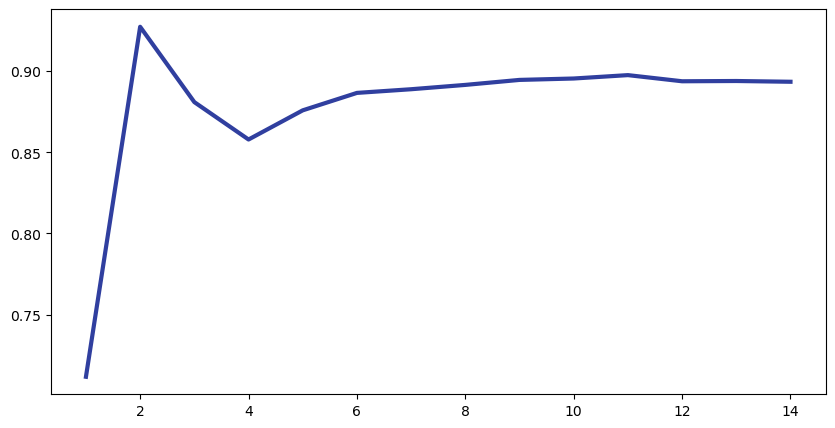

In [124]:
plt.figure(figsize=[10, 5])
plt.plot(range(1, len(rfecv.cv_results_["mean_test_score"]) + 1), rfecv.cv_results_["mean_test_score"], color='#303F9F', linewidth=3)
plt.show()

In [125]:
rfecv.n_features_

5

## Hyper-parameter tuning using Cross Validation

In [126]:
from sklearn.ensemble import RandomForestClassifier

In [127]:
from sklearn.model_selection import GridSearchCV

In [128]:
rf = RandomForestClassifier(random_state=42, n_jobs=-1)

In [129]:
hyper_params = {'max_depth': [3, 5, 10, 15, 20],
                'max_features': [3, 5, 7, 11, 15],
                'min_samples_leaf': [20, 50, 100, 200, 400],
                'n_estimators': [10, 25, 50, 80, 100]
               }

In [130]:
model_cv = GridSearchCV(estimator=rf, 
             param_grid=hyper_params,
             verbose=1,
             cv=5,
             n_jobs=-1,
             return_train_score=True,scoring='recall')

In [ ]:
model_cv.fit(X_resampled_us, y_resampled_us)

Fitting 5 folds for each of 625 candidates, totalling 3125 fits


In [ ]:
model_cv2.best_score_

In [ ]:
model_cv2.best_estimator_